In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [60]:
data = pd.read_csv("housing data.csv")

In [61]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [62]:
data.shape
print('Rows: ',data.shape[0])
print('Columns: ',data.shape[1])

Rows:  1418
Columns:  13


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In the info we can see that there missing values in Electrical,Garage Type, Fence and MiscFeature

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


We can see that there are outliers in the dataset which we need to take care

In [65]:
data.dtypes

Id              int64
OverallQual     int64
YearBuilt       int64
TotalBsmtSF     int64
Electrical     object
GrLivArea       int64
FullBath        int64
GarageType     object
GarageCars      int64
GarageArea      int64
Fence          object
MiscFeature    object
SalePrice       int64
dtype: object

In [66]:
for i in ['OverallQual','FullBath','GarageCars']:
    data[i] = data[i].astype(object)

In [67]:
data.describe(include=object).T

,count,unique,top,freq
OverallQual,1418,10,5,380
Electrical,1417,5,SBrkr,1300
FullBath,1418,4,2,747
GarageType,1275,6,Attchd,800
GarageCars,1418,5,2,787
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


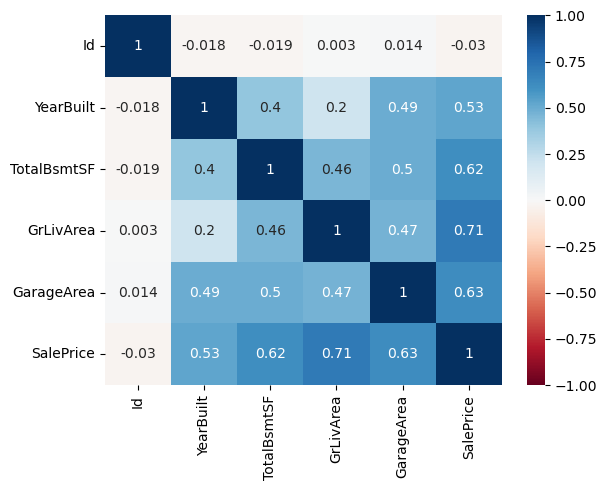

In [68]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

In [69]:
data.corr()['SalePrice']

Id            -0.029967
YearBuilt      0.528006
TotalBsmtSF    0.619852
GrLivArea      0.709503
GarageArea     0.627264
SalePrice      1.000000
Name: SalePrice, dtype: float64

### UNIVARIATE ANALYSIS

In [70]:
num_cols = data.select_dtypes(include=np.number).columns

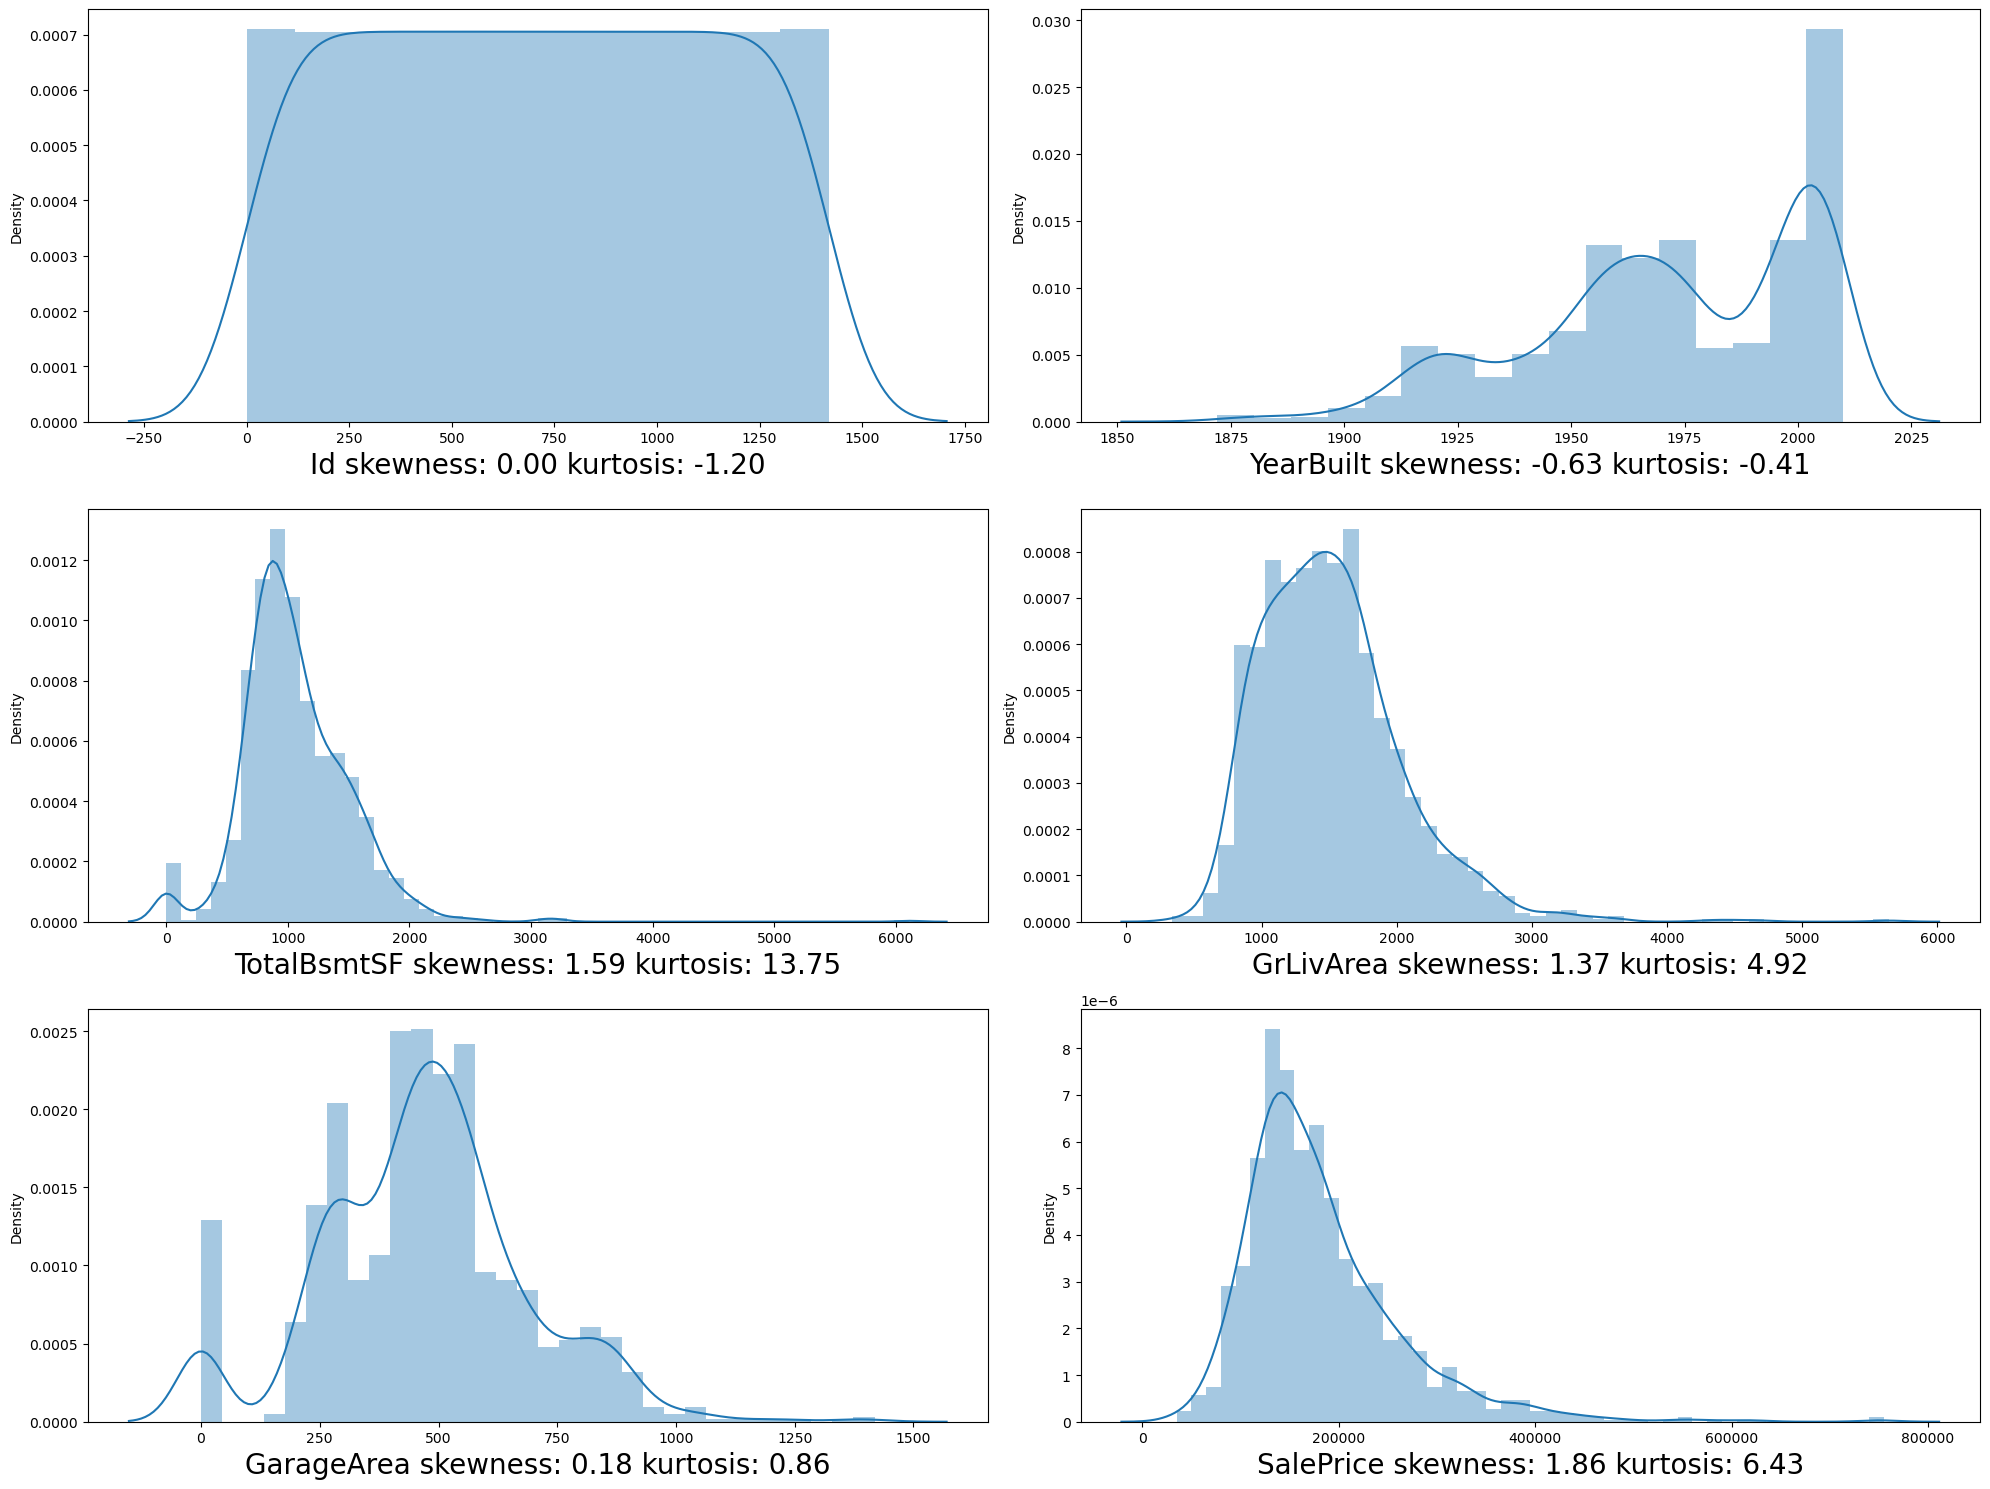

In [71]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s skewness: %.2f kurtosis: %.2f'%(i,data[i].skew(),data[i].kurt()),fontsize=20)
    t+=1
plt.tight_layout()

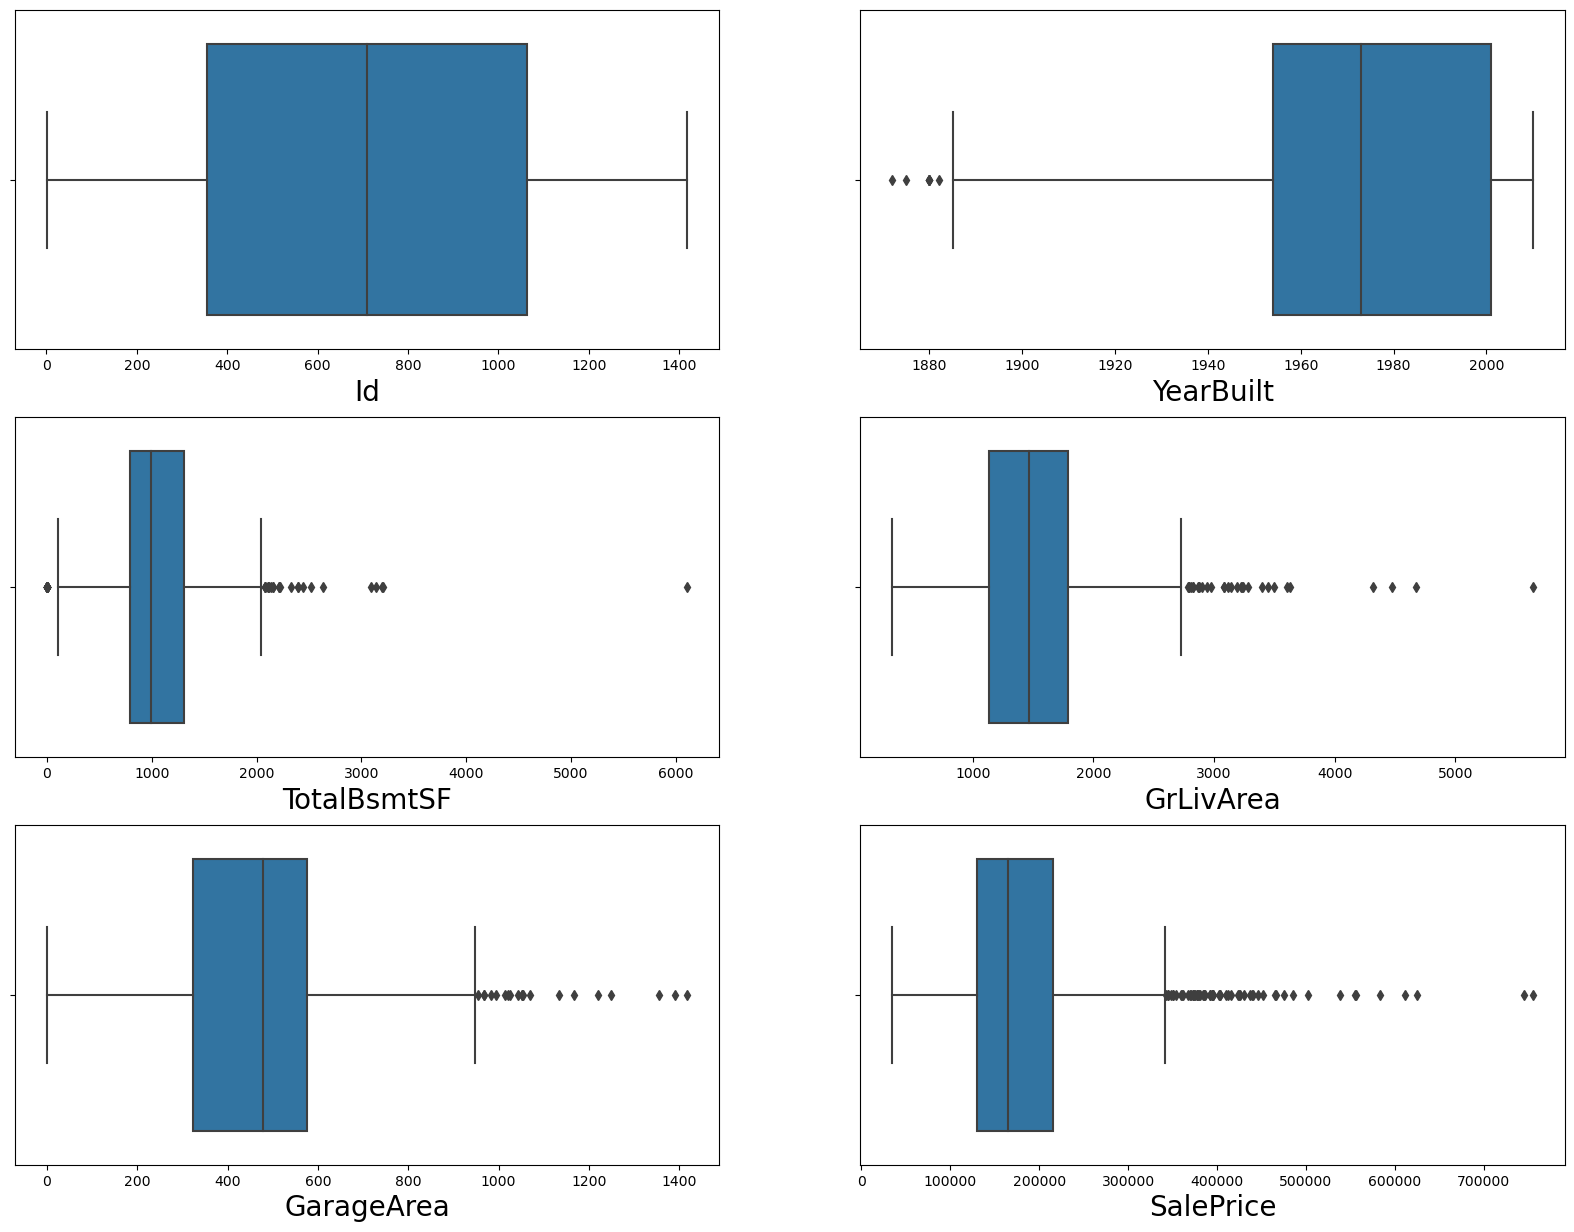

In [72]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    plt.xlabel(i,fontsize=20)
    t+=1

In [73]:
data[data['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NaN,NaN,160000


In [74]:
data[data['SalePrice']>700000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,NaN,NaN,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,MnPrv,NaN,745000


In [75]:
data[data['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,NaN,NaN,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,NaN,NaN,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,MnPrv,NaN,745000
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NaN,NaN,160000


In [76]:
cat_cols = data.select_dtypes(include=object).columns

In [77]:
cat_cols

Index(['OverallQual', 'Electrical', 'FullBath', 'GarageType', 'GarageCars',
       'Fence', 'MiscFeature'],
      dtype='object')

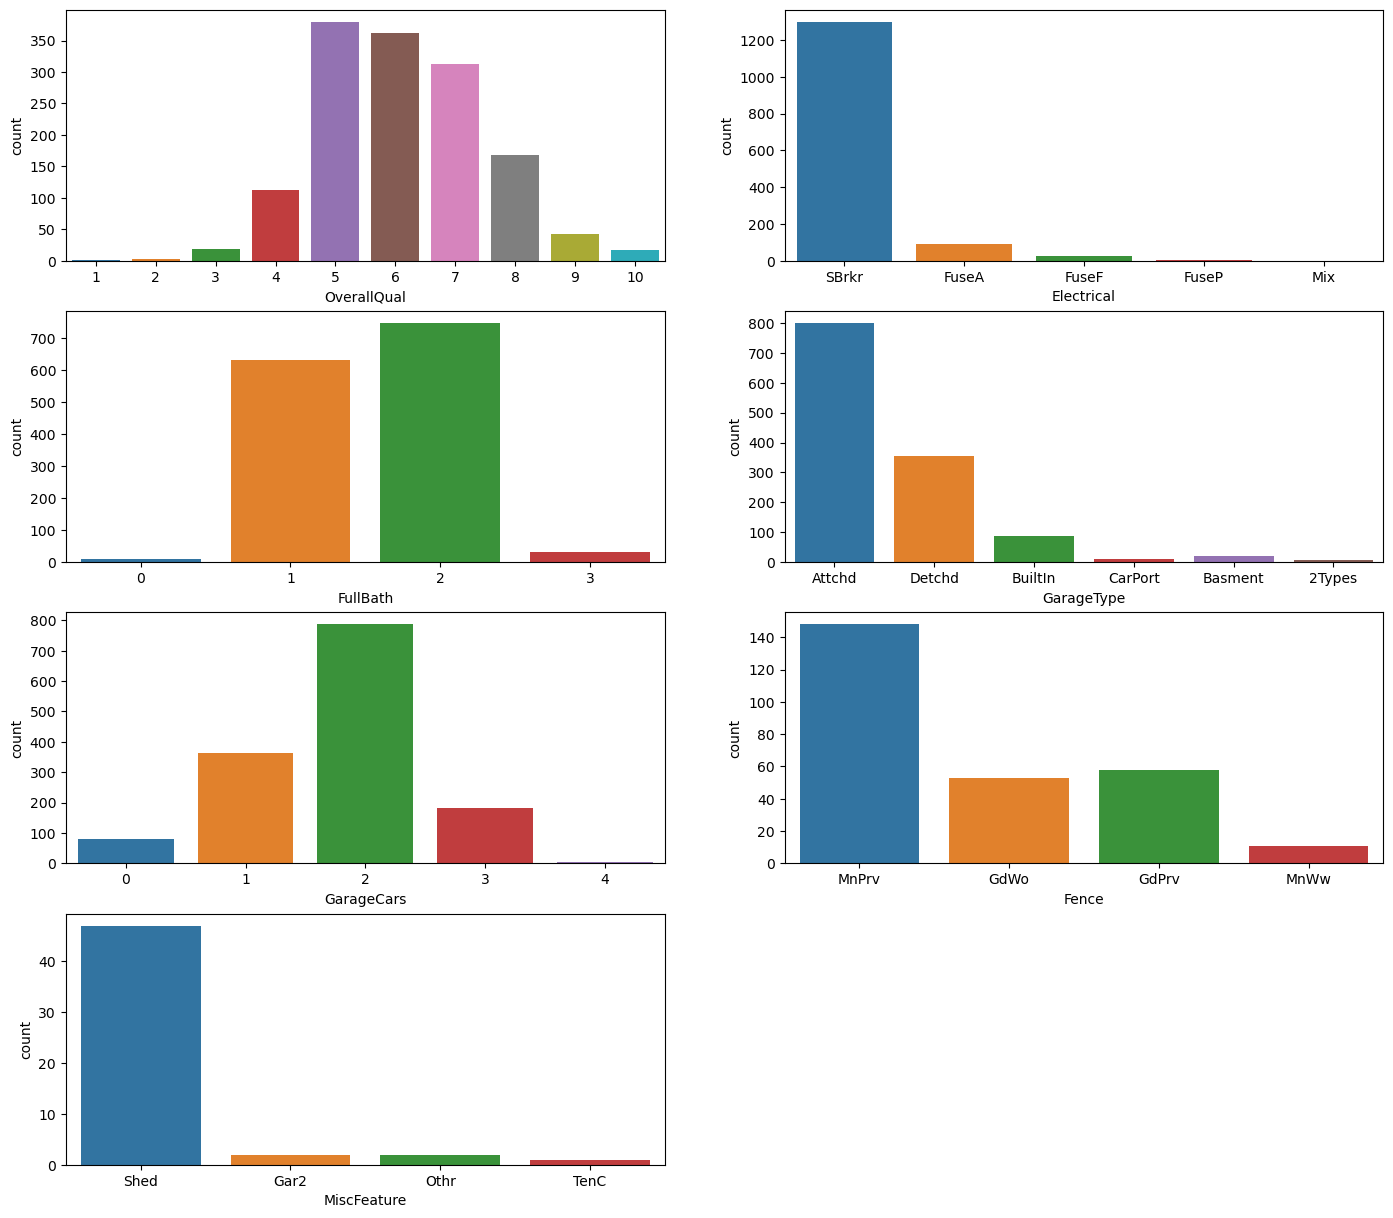

In [78]:
plt.figure(figsize=(17,15))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data[i])
    t+=1

### BIVARIATE ANALYSIS

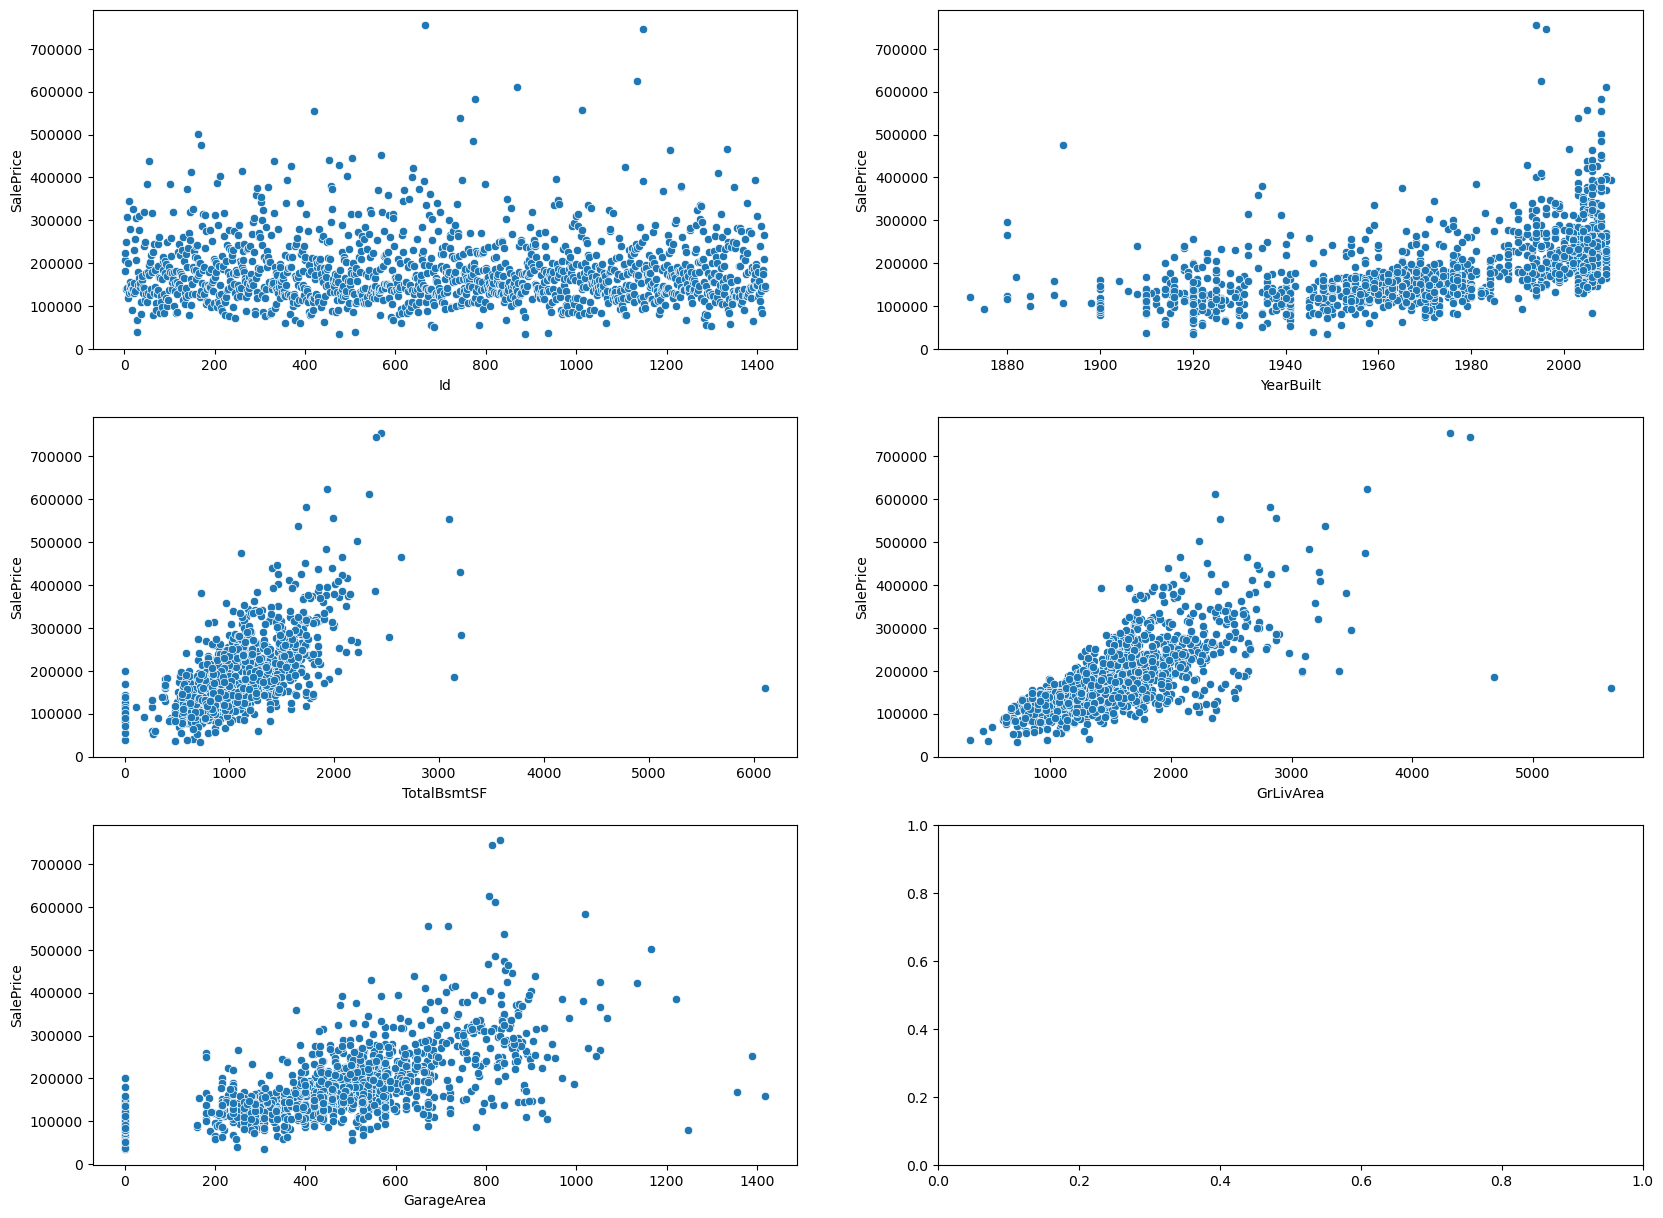

In [79]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    if i!='SalePrice':
        sns.scatterplot(data[i],data['SalePrice'])
    t+=1

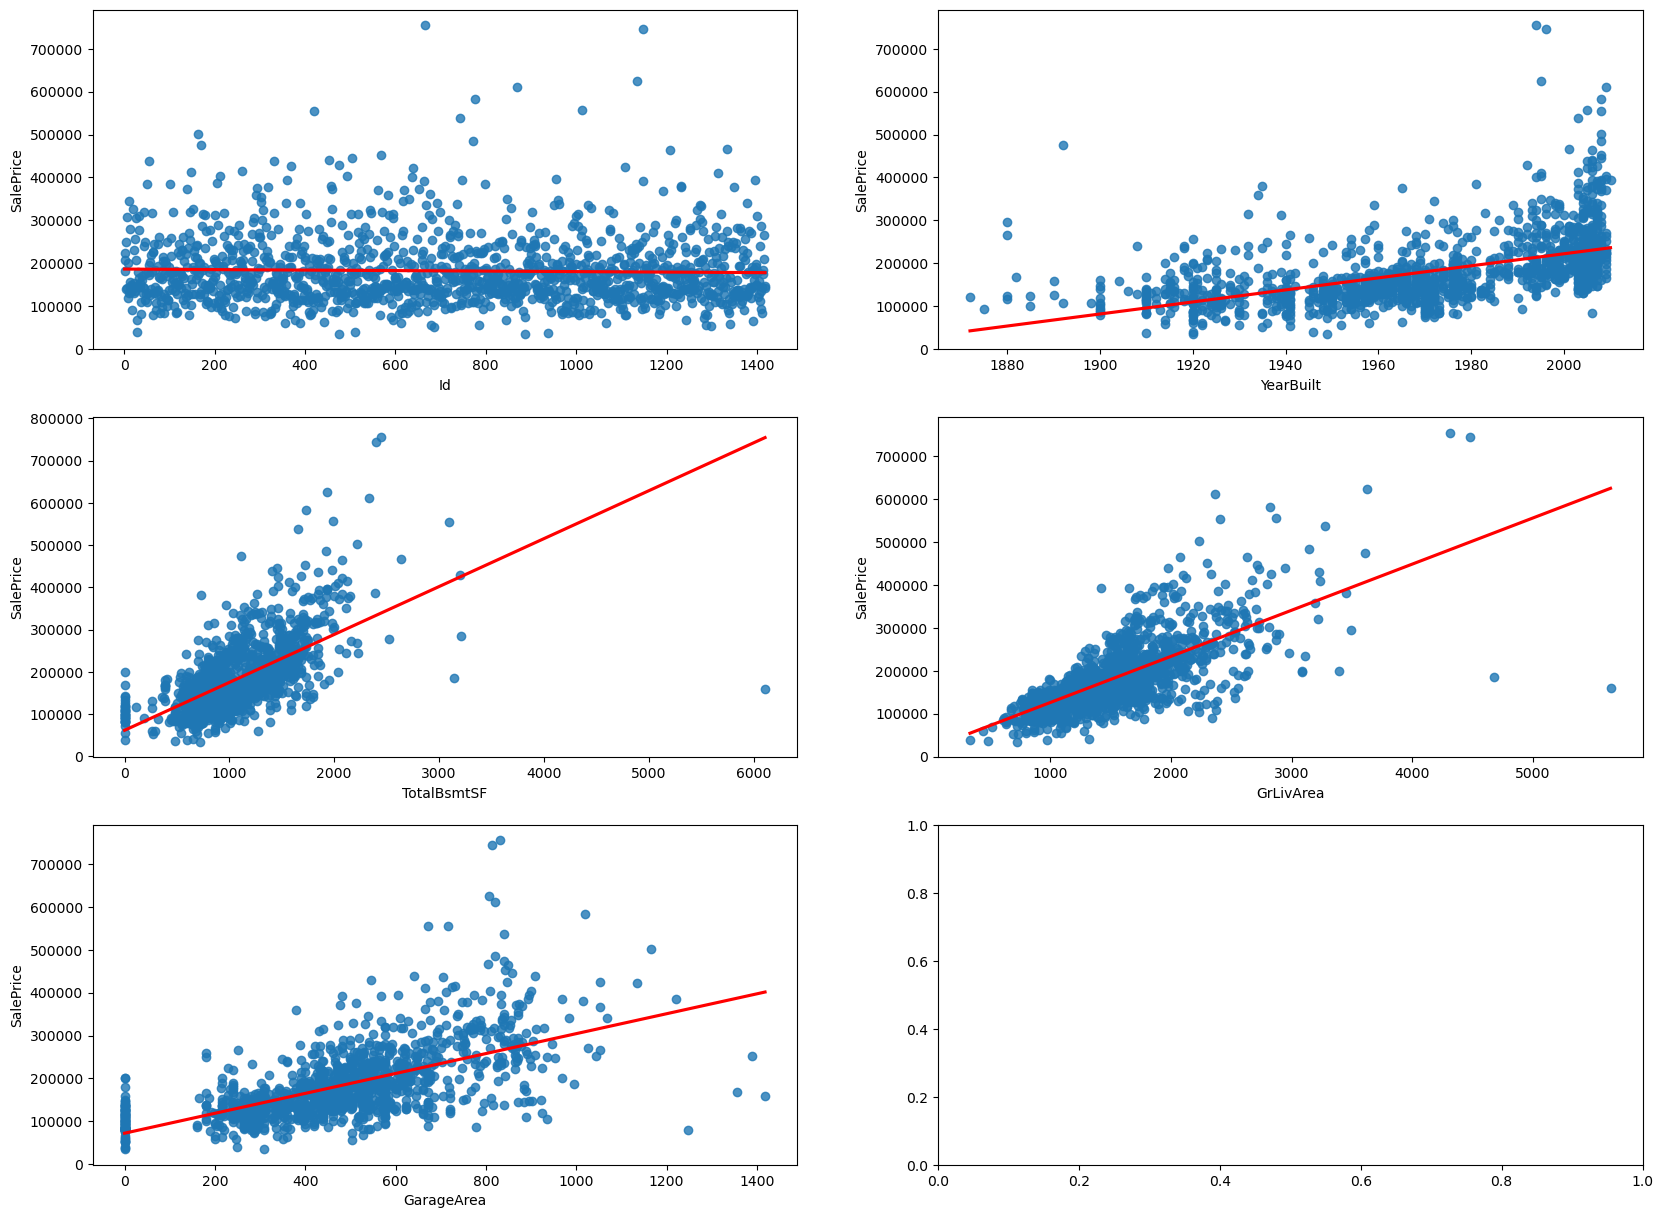

In [80]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    if i!='SalePrice':
        sns.regplot(data[i],data['SalePrice'],line_kws={'color':'red'},ci=0)
        t+=1

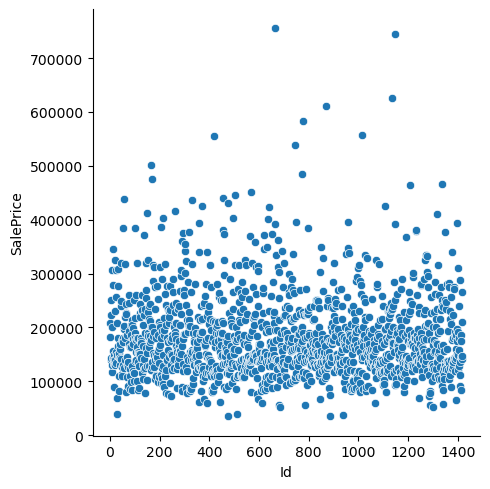

In [81]:
sns.relplot(x='Id',y='SalePrice',data=data)

In [82]:
data[data['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NaN,NaN,160000


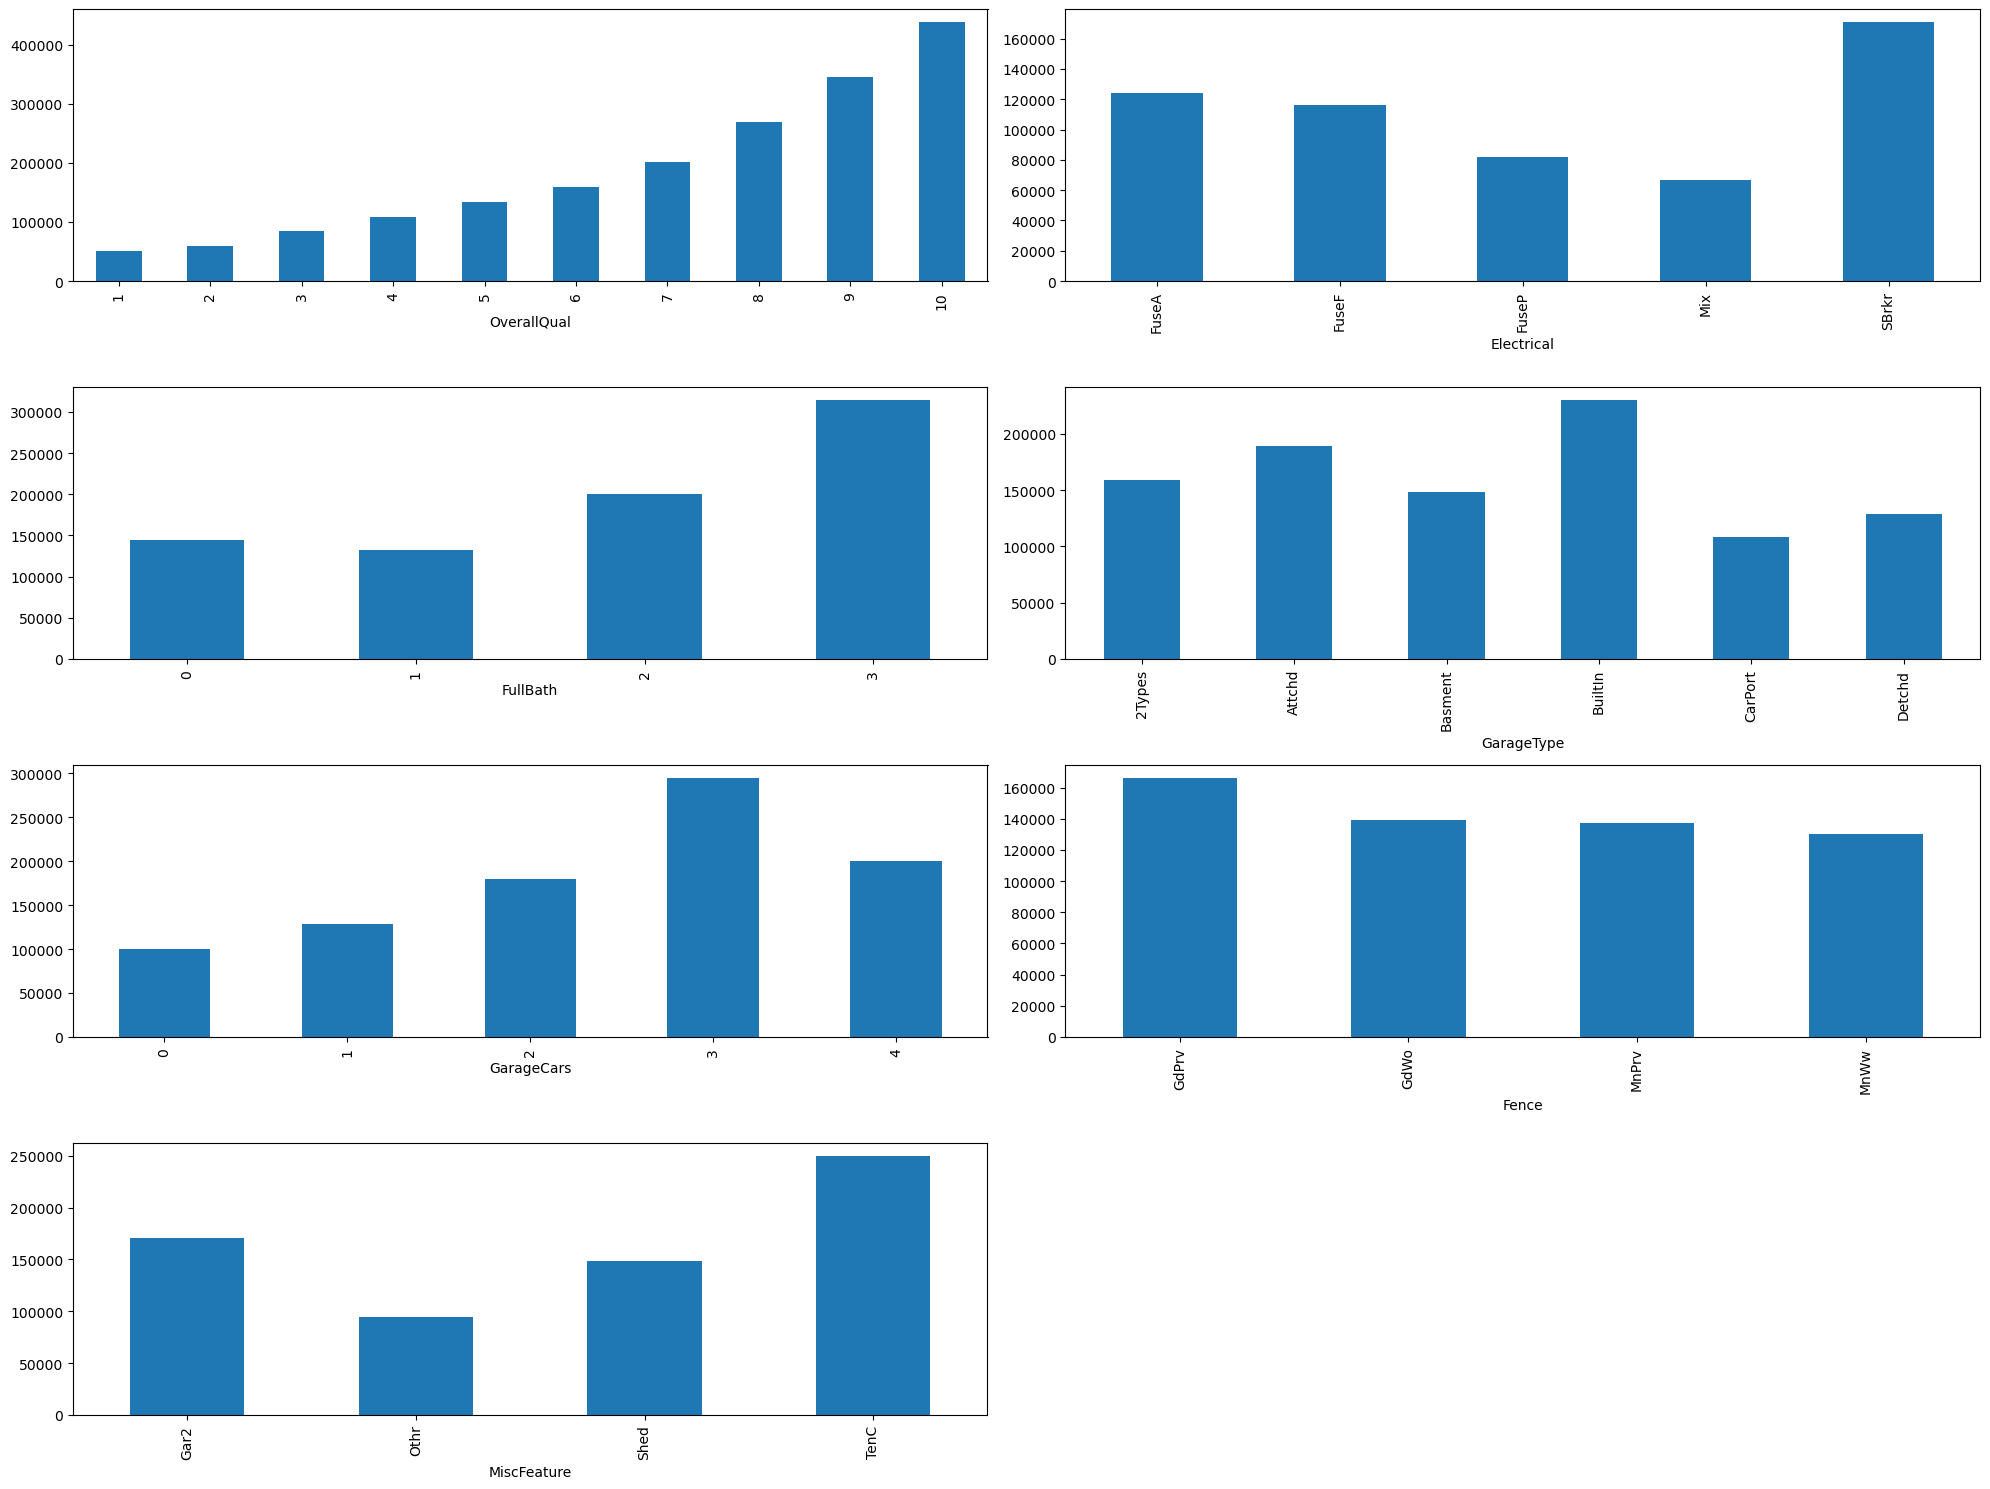

In [83]:
plt.figure(figsize=(20,15))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].median().plot(kind='bar')
    t+=1
plt.tight_layout()

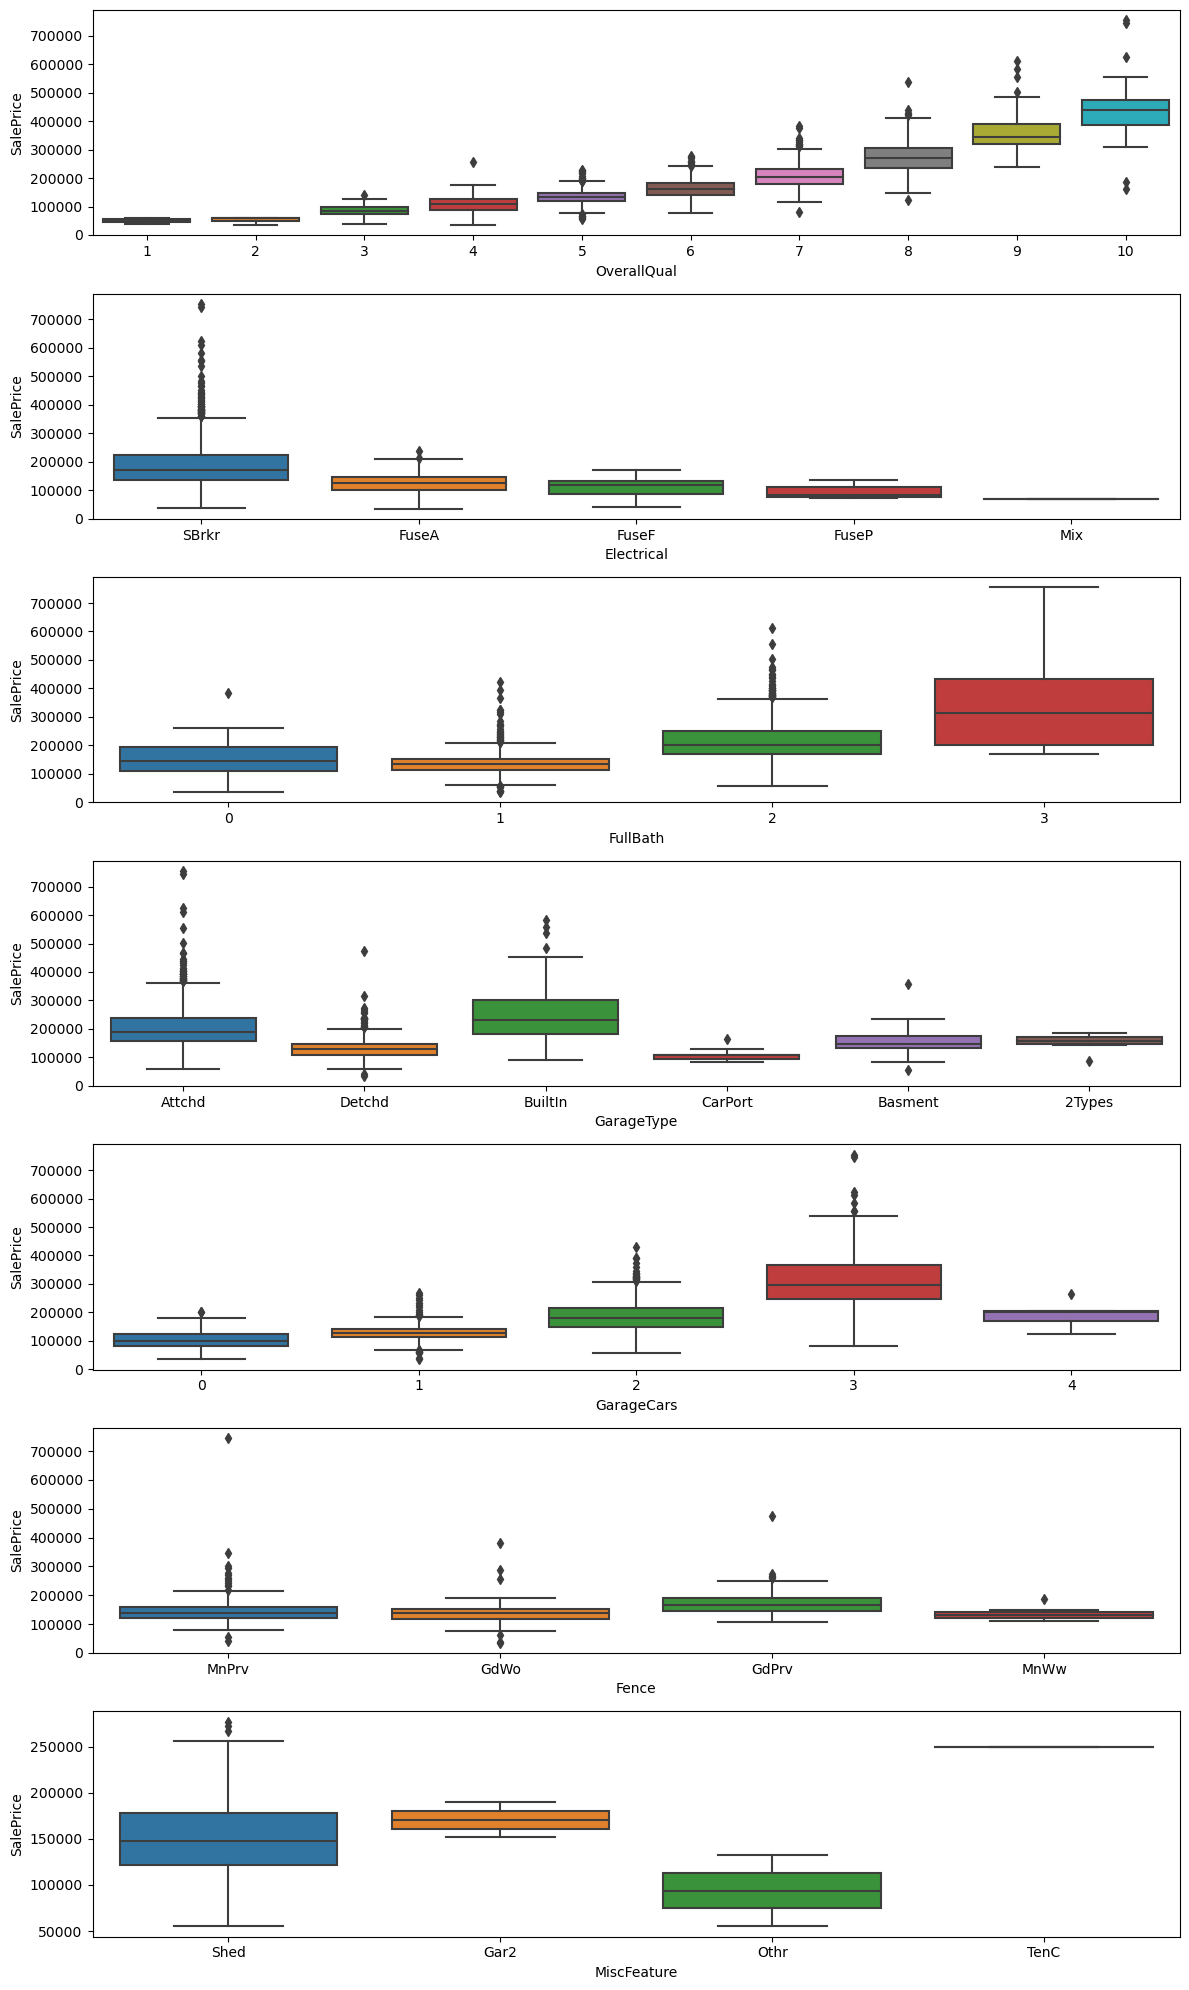

In [84]:
plt.figure(figsize=(12,20))
t=1
for i in cat_cols:
    plt.subplot(7,1,t)
    sns.boxplot(x = data[i],y=data['SalePrice'])
    t+=1
plt.tight_layout()


## DATA PREPROCESSING

In [85]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [86]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [87]:
data['Electrical'].mode()[0]

'SBrkr'

In [88]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

<AxesSubplot:>

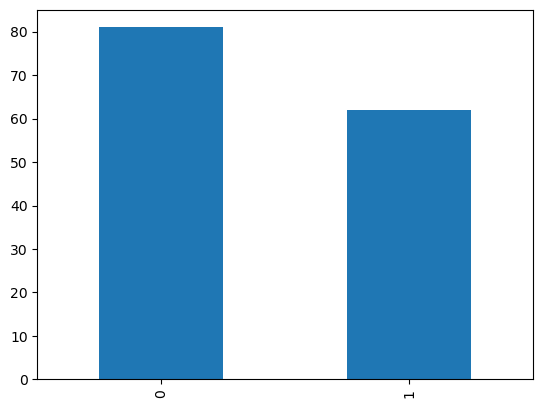

In [89]:
    data[data['GarageType'].isnull()]['GarageCars'].value_counts().plot(kind='bar')

In [90]:
data.groupby(by=['GarageCars'])['GarageArea'].median()

GarageCars
0      0.0
1    288.0
2    506.0
3    818.0
4    864.0
Name: GarageArea, dtype: float64

In [91]:
data['GarageType'] = np.where((data['GarageCars']==0)&(data['GarageArea']==0),
                             'NoGarage',
                             data['GarageType'])

In [92]:
data['GarageType'].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [93]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [94]:
data.GarageType.fillna('Detchd',inplace=True)

In [95]:
data.drop(columns=['Fence','MiscFeature'],inplace=True)

In [96]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

### OUTLIER TREATMENT

In [97]:
for i in num_cols:
    #q1,q3 = np.quantile(data[i],[0.25,0.75])
    #iqr = q3-q1
    #ul = q3+(1.5*iqr)
    #ll = q1-(1.5*iqr)
    ll,ul = np.quantile(data[i],[0.05,0.95])
    data.loc[data[i]>ul,i]=ul
    data.loc[data[i]<ll,i]=ll

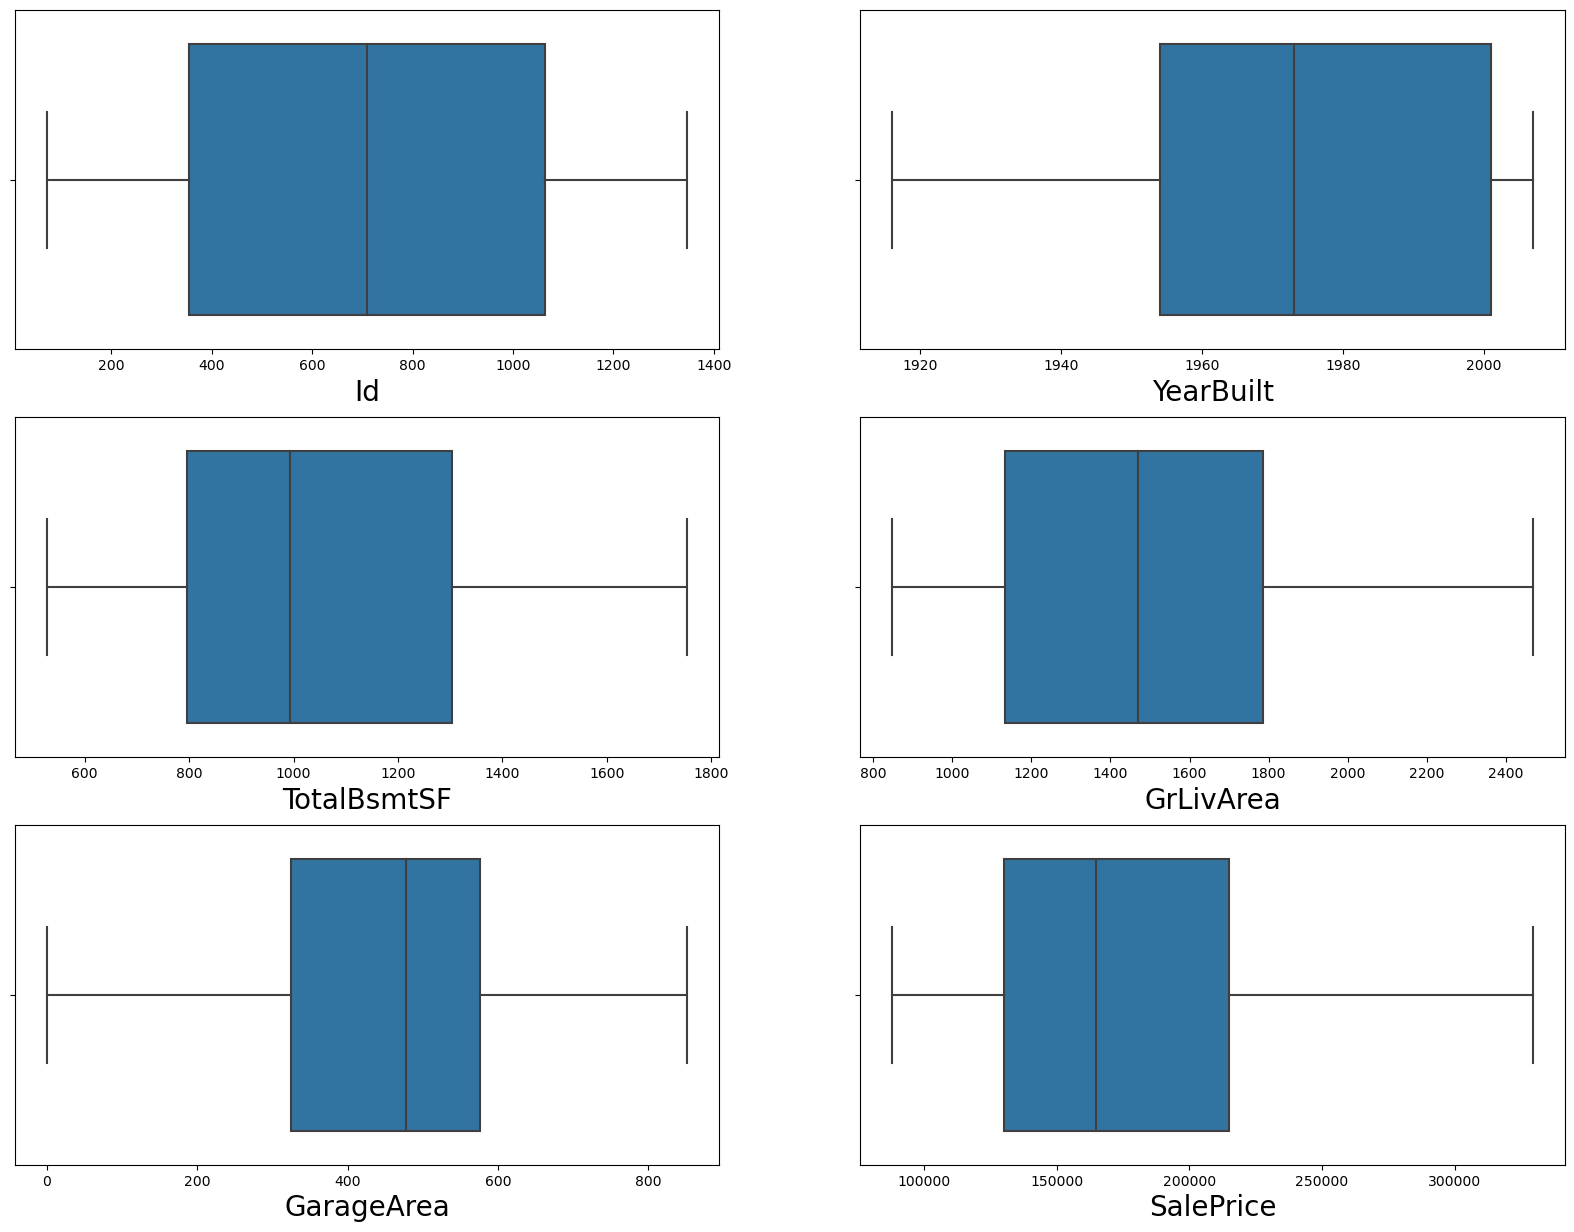

In [98]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    plt.xlabel(i,fontsize=20)
    t+=1

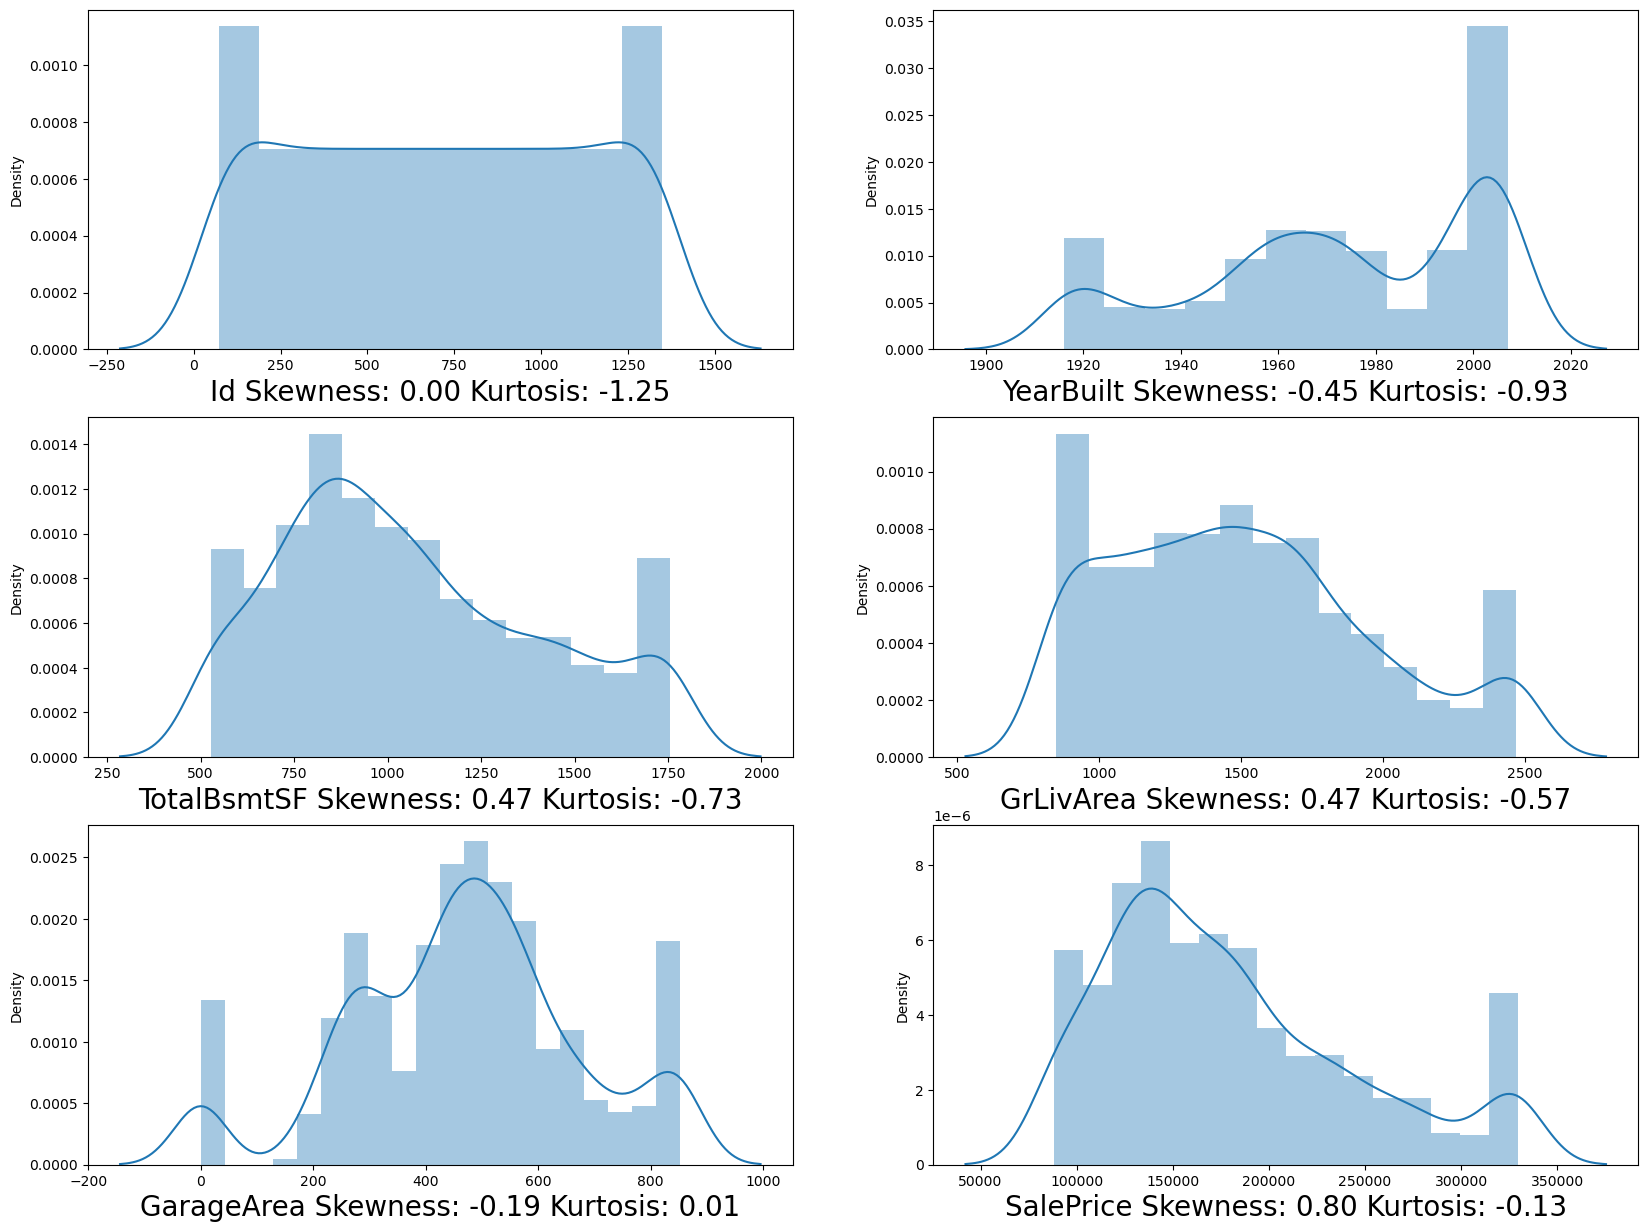

In [99]:
plt.figure(figsize=(20,15))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f Kurtosis: %.2f'%(i,data[i].skew(),data[i].kurt()),fontsize=20)
    t+=1

## FEATURE ENGINEERING

### ENCODING

In [100]:
data.select_dtypes(include=object)

,OverallQual,Electrical,FullBath,GarageType,GarageCars
0,7,SBrkr,2,Attchd,2
1,6,SBrkr,2,Attchd,2
2,7,SBrkr,2,Attchd,2
3,7,SBrkr,1,Detchd,3
4,8,SBrkr,2,Attchd,3
5,5,SBrkr,1,Attchd,2
6,8,SBrkr,2,Attchd,2
7,7,SBrkr,2,Attchd,2
8,5,SBrkr,1,Detchd,1
9,5,SBrkr,1,Detchd,1


In [101]:
for i in ['OverallQual','FullBath','GarageCars']:
    data[i] = data[i].astype(int)

In [102]:
data.select_dtypes(include=object)

,Electrical,GarageType
0,SBrkr,Attchd
1,SBrkr,Attchd
2,SBrkr,Attchd
3,SBrkr,Detchd
4,SBrkr,Attchd
5,SBrkr,Attchd
6,SBrkr,Attchd
7,SBrkr,Attchd
8,SBrkr,Detchd
9,SBrkr,Detchd


In [103]:
data['Electrical']= np.where(data['Electrical']=='SBrkr',1,0)

In [104]:
data = pd.get_dummies(data,drop_first=True)

In [105]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,71.85,7,2003,856.0,1,1710.0,2,2,548.0,208500.0,1,0,0,0,0,0
1,71.85,6,1976,1262.0,1,1262.0,2,2,460.0,181500.0,1,0,0,0,0,0
2,71.85,7,2001,920.0,1,1786.0,2,2,608.0,223500.0,1,0,0,0,0,0
3,71.85,7,1916,756.0,1,1717.0,1,3,642.0,140000.0,0,0,0,0,1,0
4,71.85,8,2000,1145.0,1,2198.0,2,3,836.0,250000.0,1,0,0,0,0,0


### TRANSFORMATION (NORMAL TRANSFORMATION)

In [106]:
del data['Id']

In [107]:
sca_data = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea']

In [108]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856.0,1,1710.0,2,2,548.0,208500.0,1,0,0,0,0,0
1,6,1976,1262.0,1,1262.0,2,2,460.0,181500.0,1,0,0,0,0,0
2,7,2001,920.0,1,1786.0,2,2,608.0,223500.0,1,0,0,0,0,0
3,7,1916,756.0,1,1717.0,1,3,642.0,140000.0,0,0,0,0,1,0
4,8,2000,1145.0,1,2198.0,2,3,836.0,250000.0,1,0,0,0,0,0


In [109]:
for i in sca_data:
    data[i] = np.sqrt(data[i])

In [110]:
from scipy.stats import boxcox

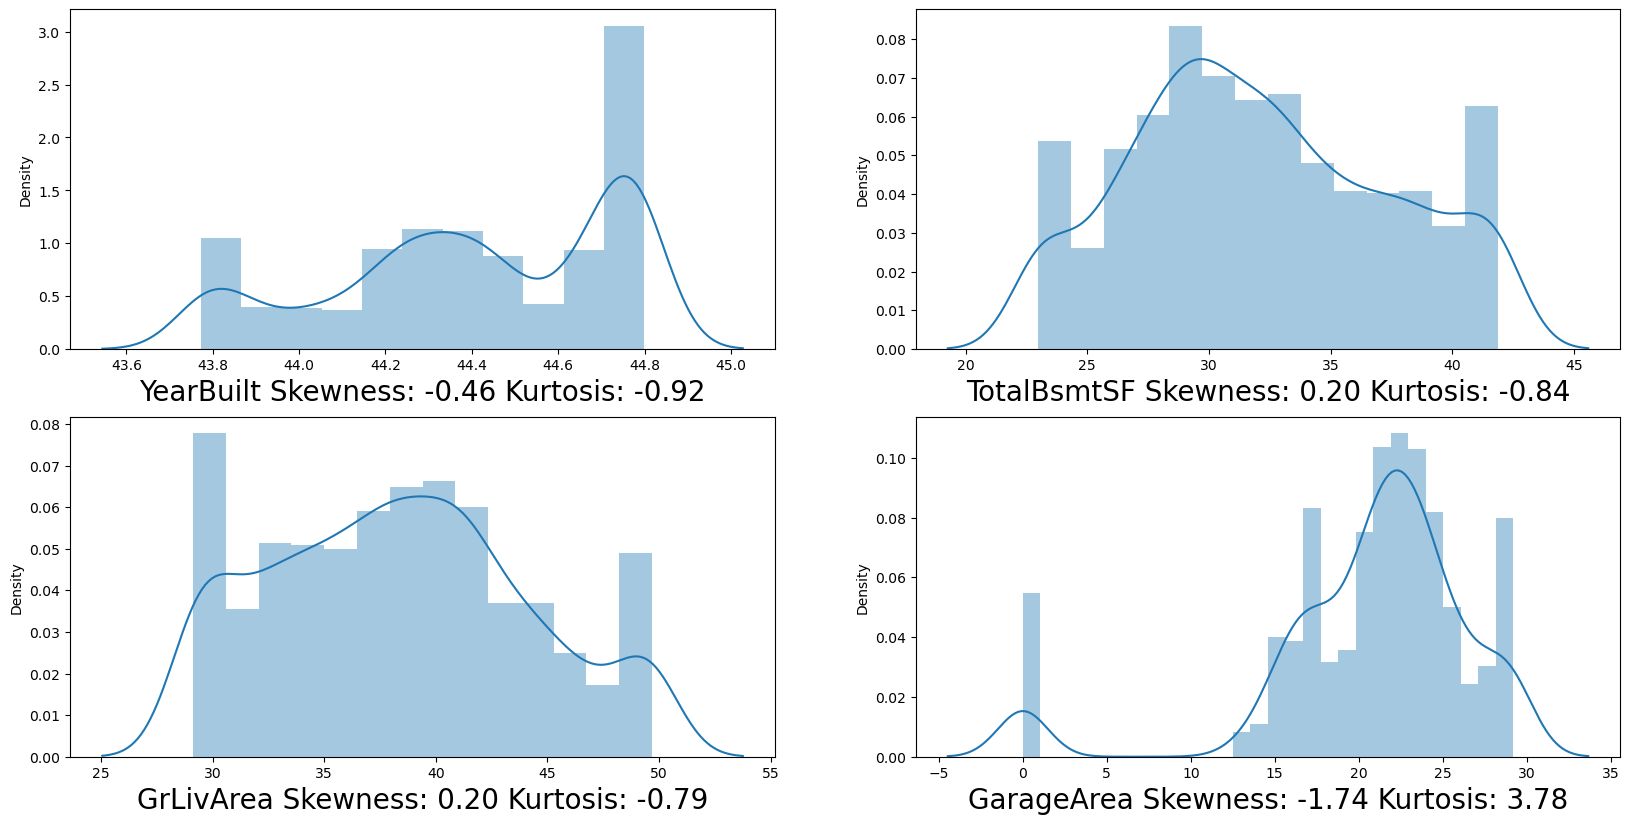

In [111]:
plt.figure(figsize=(20,15))
t=1
for i in sca_data:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f Kurtosis: %.2f'%(i,data[i].skew(),data[i].kurt()),fontsize=20)
    t+=1

In [112]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,44.754888,29.257478,1,41.352146,2,2,23.409400,208500.0,1,0,0,0,0,0
1,6,44.452222,35.524639,1,35.524639,2,2,21.447611,181500.0,1,0,0,0,0,0
2,7,44.732538,30.331502,1,42.261093,2,2,24.657656,223500.0,1,0,0,0,0,0
3,7,43.772137,27.495454,1,41.436699,1,3,25.337719,140000.0,0,0,0,0,1,0
4,8,44.721360,33.837849,1,46.882833,2,3,28.913665,250000.0,1,0,0,0,0,0


### SCALING

In [113]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer

In [116]:
pt=PowerTransformer(method='box-cox')

In [117]:
sc = StandardScaler()

In [118]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,44.754888,29.257478,1,41.352146,2,2,23.409400,208500.0,1,0,0,0,0,0
1,6,44.452222,35.524639,1,35.524639,2,2,21.447611,181500.0,1,0,0,0,0,0
2,7,44.732538,30.331502,1,42.261093,2,2,24.657656,223500.0,1,0,0,0,0,0
3,7,43.772137,27.495454,1,41.436699,1,3,25.337719,140000.0,0,0,0,0,1,0
4,8,44.721360,33.837849,1,46.882833,2,3,28.913665,250000.0,1,0,0,0,0,0


In [119]:
rs = RobustScaler()
for i in sca_data:
    
    data[i] = rs.fit_transform(pd.DataFrame(data[i]))

In [120]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,0.636603,-0.288046,1,0.352111,2,2,0.257996,208500.0,1,0,0,0,0,0
1,6,0.063877,0.507109,1,-0.324840,2,2,-0.069347,181500.0,1,0,0,0,0,0
2,7,0.594312,-0.151778,1,0.457699,2,2,0.466280,223500.0,1,0,0,0,0,0
3,7,-1.223025,-0.511605,1,0.361933,1,3,0.579755,140000.0,0,0,0,0,1,0
4,8,0.573158,0.293095,1,0.994582,2,3,1.176436,250000.0,1,0,0,0,0,0


#### We are making it a classification problem

In [121]:
data['SalePrice'].describe()

count      1418.000000
mean     178588.670804
std       65210.545811
min       88000.000000
25%      130000.000000
50%      164800.000000
75%      215000.000000
max      329540.200000
Name: SalePrice, dtype: float64

In [122]:
data['Luxury'] = np.where(data['SalePrice']>200000,1,0)

In [123]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Luxury
0,7,0.636603,-0.288046,1,0.352111,2,2,0.257996,208500.0,1,0,0,0,0,0,1
1,6,0.063877,0.507109,1,-0.324840,2,2,-0.069347,181500.0,1,0,0,0,0,0,0
2,7,0.594312,-0.151778,1,0.457699,2,2,0.466280,223500.0,1,0,0,0,0,0,1
3,7,-1.223025,-0.511605,1,0.361933,1,3,0.579755,140000.0,0,0,0,0,1,0,0
4,8,0.573158,0.293095,1,0.994582,2,3,1.176436,250000.0,1,0,0,0,0,0,1


In [124]:
data['Luxury'].value_counts()

0    994
1    424
Name: Luxury, dtype: int64

In [125]:
del data['SalePrice']

In [126]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Luxury
0,7,0.636603,-0.288046,1,0.352111,2,2,0.257996,1,0,0,0,0,0,1
1,6,0.063877,0.507109,1,-0.324840,2,2,-0.069347,1,0,0,0,0,0,0
2,7,0.594312,-0.151778,1,0.457699,2,2,0.466280,1,0,0,0,0,0,1
3,7,-1.223025,-0.511605,1,0.361933,1,3,0.579755,0,0,0,0,1,0,0
4,8,0.573158,0.293095,1,0.994582,2,3,1.176436,1,0,0,0,0,0,1


### Train Test Split

In [127]:
x = data.drop(columns=['Luxury'])
y = data['Luxury']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=2)

In [234]:
x_train.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageCars,GarageArea,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
1283,3,-0.512775,-1.085974,1,-1.068783,1,1,-0.821306,0,0,0,0,1,0
510,1,-0.577094,-1.085974,0,-1.068783,1,0,-3.648088,0,0,0,0,0,1
740,6,-0.705880,-0.022195,1,0.407970,2,1,-0.216291,1,0,0,0,0,0
833,5,-0.298737,0.298716,1,-0.515640,1,1,0.677409,0,0,0,0,1,0
842,5,-0.427094,-1.085974,1,-0.947302,1,2,-0.252996,1,0,0,0,0,0


In [130]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1134, 14) (284, 14) (1134,) (284,)


In [131]:
y.value_counts(normalize=True)

0    0.700987
1    0.299013
Name: Luxury, dtype: float64

In [132]:
y_test.value_counts(normalize=True)

0    0.700704
1    0.299296
Name: Luxury, dtype: float64

In [133]:
y_train.value_counts(normalize=True)

0    0.701058
1    0.298942
Name: Luxury, dtype: float64

In [134]:
import statsmodels.api as sm
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)

In [135]:
base_model = sm.Logit(y_train,X_train).fit()

         Current function value: 0.188028
         Iterations: 35


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [136]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 1134
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                           14
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.6917
Time:                        13:43:27   Log-Likelihood:                -213.22
converged:                      False   LL-Null:                       -691.70
Covariance Type:            nonrobust   LLR p-value:                2.676e-195
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -39.3597   9.71e+04     -0.000      1.000    -1.9e+05     1.9e+05
OverallQual             1.2914      0.189      6.818      0.000       0.920       1.663
YearBuilt               0.5809      0.400      1.452      0.146      -0.203       1.365
TotalBsmtSF             1.6174      0.239      6.779      0.000       1.150       2.085
Electrical              2.3053      1.277      1.806      0.071      -0.197       4.808
GrLivArea               3.4028      0.396      8.587      0.000       2.626       4.179
FullBath               -0.2127      0.345     -0.616      0.538      -0.890       0.464
GarageCars              0.1443      0.476      0.303      0.762      -0.788       1.076
GarageArea              0.6001      0.408      1.469      0.142      -0.200       1.401
GarageType_Attchd      26.6125   9.71e+04      0.000      1.000    -1.9e+05     1.9e+05
GarageType_Basment     23.7003   9.71e+04      0.000      1.000    -1.9e+05     1.9e+05
GarageType_BuiltIn     27.0683   9.71e+04      0.000      1.000    -1.9e+05     1.9e+05
GarageType_CarPort    -14.5554   4.01e+08  -3.63e-08      1.000   -7.85e+08    7.85e+08
GarageType_Detchd      26.0172   9.71e+04      0.000      1.000    -1.9e+05     1.9e+05
GarageType_NoGarage    27.4979   9.71e+04      0.000      1.000    -1.9e+05     1.9e+05
=======================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [137]:
y_pred_prob = base_model.predict(X_test)

In [138]:
y_pred_prob

942     3.034987e-01
868     9.997930e-01
967     1.662101e-01
1150    9.777302e-04
1303    9.901777e-01
1339    3.716074e-03
264     9.198246e-01
730     1.167074e-02
675     8.363088e-02
882     1.753878e-04
791     3.555576e-01
1335    9.526172e-01
1070    8.697152e-04
861     1.149869e-01
551     3.886058e-04
664     1.496312e-03
345     6.034417e-02
1374    7.479120e-01
373     1.182625e-05
644     4.091428e-02
862     4.196124e-03
1156    2.000688e-01
547     2.214191e-01
866     5.130279e-05
1003    9.925584e-01
1133    6.556447e-02
1092    7.274223e-01
1121    1.035261e-02
1078    7.292113e-06
550     5.250981e-02
237     2.304491e-01
1310    5.972143e-01
1342    8.449246e-02
607     3.840245e-01
311     1.257950e-01
1065    5.094780e-01
1393    3.967121e-03
1089    2.728405e-05
536     5.696958e-01
946     5.115128e-05
338     6.152099e-03
1365    1.080461e-04
927     3.293608e-01
1244    2.604439e-01
952     1.236299e-02
692     9.921265e-01
339     9.348942e-04
1043    6.171

In [139]:
y_pred = np.where(y_pred_prob>0.5,1,0)

In [140]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,cohen_kappa_score

In [142]:
def scores(actual,predicted):
    print('Confusion Metrics:\n',confusion_matrix(actual,predicted))
    print('Accuracy: ',accuracy_score(actual,predicted))
    print('Recall: ',recall_score(actual,predicted))
    print('Precision: ',precision_score(actual,predicted))
    print('F1 score: ',f1_score(actual,predicted))
    print('Cohen kappa Score: ',cohen_kappa_score(actual,predicted))
    print('Classification Summary:\n',classification_report(actual,predicted))

In [143]:
scores(y_test,y_pred)

Confusion Metrics:
 [[186  13]
 [ 19  66]]
Accuracy:  0.8873239436619719
Recall:  0.7764705882352941
Precision:  0.8354430379746836
F1 score:  0.8048780487804879
Cohen kappa Score:  0.7258191033608883
Classification Summary:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       199
           1       0.84      0.78      0.80        85

    accuracy                           0.89       284
   macro avg       0.87      0.86      0.86       284
weighted avg       0.89      0.89      0.89       284



In [144]:
from sklearn.metrics import roc_auc_score, roc_curve

In [145]:
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

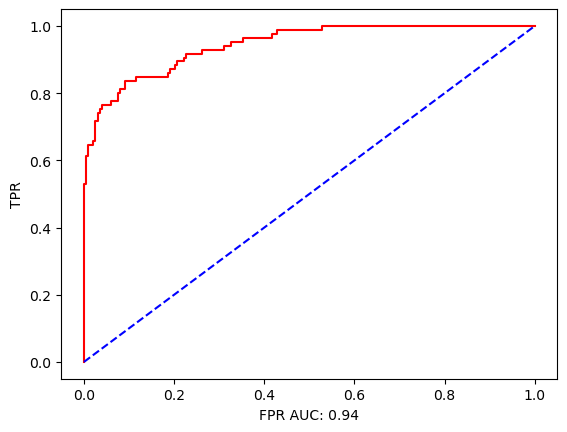

In [146]:
roc(y_test,y_pred_prob)

In [147]:
fpr,tpr,thres = roc_curve(y_test,y_pred_prob)

In [148]:
data_thres = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thres':thres,'Youden Index':(tpr-fpr)})

In [149]:
data_thres.sort_values(by='Youden Index',ascending=False)

,FPR,TPR,Thres,Youden Index
24,0.090452,0.835294,3.555576e-01,0.744842
26,0.115578,0.847059,3.324196e-01,0.731481
22,0.080402,0.811765,3.997560e-01,0.731363
27,0.120603,0.847059,3.293608e-01,0.726456
20,0.075377,0.800000,4.280110e-01,0.724623
16,0.040201,0.764706,5.696958e-01,0.724505
23,0.090452,0.811765,3.793485e-01,0.721312
25,0.115578,0.835294,3.396841e-01,0.719716
21,0.080402,0.800000,4.163602e-01,0.719598
14,0.035176,0.752941,5.844174e-01,0.717765


### Balancing the dataset

In [150]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [151]:
from imblearn.over_sampling import SMOTE

In [152]:
over_samp = SMOTE()

In [153]:
x_train_os,y_train_os = over_samp.fit_resample(x_train,y_train)

In [154]:
y_train_os.value_counts()

0    795
1    795
Name: Luxury, dtype: int64

### Logistic Regression (sklearn)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
model_lr = LogisticRegression()

In [157]:
model_lr.fit(x_train_os,y_train_os)

LogisticRegression()

In [158]:
y_pred_lr = model_lr.predict(x_test)

In [159]:
scores(y_test,y_pred_lr)

Confusion Metrics:
 [[173  26]
 [ 13  72]]
Accuracy:  0.8626760563380281
Recall:  0.8470588235294118
Precision:  0.7346938775510204
F1 score:  0.7868852459016393
Cohen kappa Score:  0.6863389216130493
Classification Summary:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       199
           1       0.73      0.85      0.79        85

    accuracy                           0.86       284
   macro avg       0.83      0.86      0.84       284
weighted avg       0.87      0.86      0.87       284



In [160]:
y_pred_lr_prob = model_lr.predict_proba(x_test)[:,1]

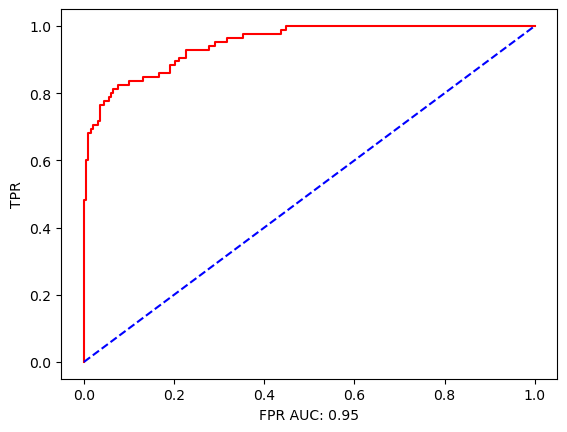

In [161]:
roc(y_test,y_pred_lr_prob)

### KNN Model

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
model_knn = KNeighborsClassifier(n_neighbors=7)

In [164]:
model_knn.fit(x_train_os,y_train_os)

KNeighborsClassifier(n_neighbors=7)

In [165]:
y_pred_knn = model_knn.predict(x_test)

In [166]:
scores(y_test,y_pred_knn)

Confusion Metrics:
 [[161  38]
 [  9  76]]
Accuracy:  0.8345070422535211
Recall:  0.8941176470588236
Precision:  0.6666666666666666
F1 score:  0.7638190954773869
Cohen kappa Score:  0.6405644118914261
Classification Summary:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       199
           1       0.67      0.89      0.76        85

    accuracy                           0.83       284
   macro avg       0.81      0.85      0.82       284
weighted avg       0.86      0.83      0.84       284



In [167]:
y_pred_prob_knn = model_knn.predict_proba(x_test)[:,1]

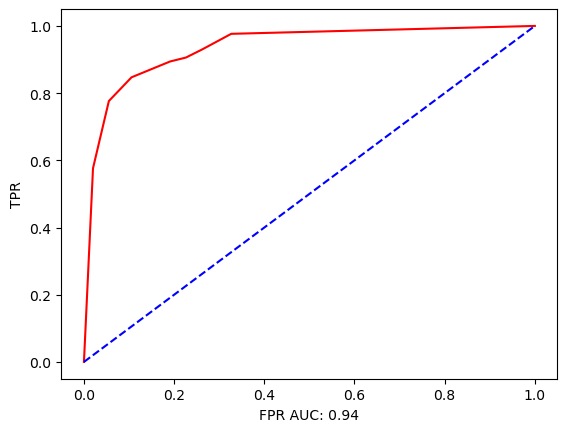

In [168]:
roc(y_test,y_pred_prob_knn)

In [169]:
# Lets tune the n_neighbours

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
params = {'n_neighbors':[3,5,7,9,11]}

In [172]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,
                   scoring='f1',verbose=3,cv=3)

In [173]:
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....................n_neighbors=3;, score=0.909 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.919 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.913 total time=   0.0s
[CV 1/3] END .....................n_neighbors=5;, score=0.906 total time=   0.0s
[CV 2/3] END .....................n_neighbors=5;, score=0.908 total time=   0.0s
[CV 3/3] END .....................n_neighbors=5;, score=0.887 total time=   0.0s
[CV 1/3] END .....................n_neighbors=7;, score=0.912 total time=   0.0s
[CV 2/3] END .....................n_neighbors=7;, score=0.907 total time=   0.0s
[CV 3/3] END .....................n_neighbors=7;, score=0.898 total time=   0.0s
[CV 1/3] END .....................n_neighbors=9;, score=0.906 total time=   0.0s
[CV 2/3] END .....................n_neighbors=9;, score=0.898 total time=   0.0s
[CV 3/3] END .....................n_neighbors=9;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1',
             verbose=3)

In [174]:
gscv.best_params_

{'n_neighbors': 3}

In [175]:
model_knn = KNeighborsClassifier(**gscv.best_params_)

In [176]:
model_knn.fit(x_train_os,y_train_os)

KNeighborsClassifier(n_neighbors=3)

In [177]:
y_pred_knn = model_knn.predict(x_test)

In [178]:
scores(y_test,y_pred_knn)

Confusion Metrics:
 [[169  30]
 [ 12  73]]
Accuracy:  0.852112676056338
Recall:  0.8588235294117647
Precision:  0.7087378640776699
F1 score:  0.776595744680851
Cohen kappa Score:  0.667577058134998
Classification Summary:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       199
           1       0.71      0.86      0.78        85

    accuracy                           0.85       284
   macro avg       0.82      0.85      0.83       284
weighted avg       0.87      0.85      0.86       284



In [179]:
y_pred_prob_knn = model_knn.predict_proba(x_test)[:,1]

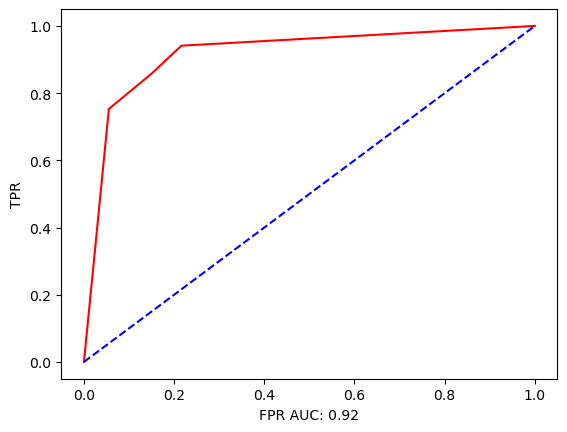

In [180]:
roc(y_test,y_pred_prob_knn)

### NAive Bayes Model

In [181]:
from sklearn.naive_bayes import GaussianNB

In [182]:
model_nb = GaussianNB()

In [183]:
model_nb.fit(x_train_os,y_train_os)

GaussianNB()

In [184]:
y_pred_nb = model_nb.predict(x_test)

In [185]:
y_pred_nb

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [186]:
y_pred_nb_prob = model_nb.predict_proba(x_test)[:,1]

In [187]:
scores(y_test,y_pred_nb)

Confusion Metrics:
 [[ 96 103]
 [  9  76]]
Accuracy:  0.6056338028169014
Recall:  0.8941176470588236
Precision:  0.4245810055865922
F1 score:  0.5757575757575757
Cohen kappa Score:  0.2859516005926459
Classification Summary:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63       199
           1       0.42      0.89      0.58        85

    accuracy                           0.61       284
   macro avg       0.67      0.69      0.60       284
weighted avg       0.77      0.61      0.61       284



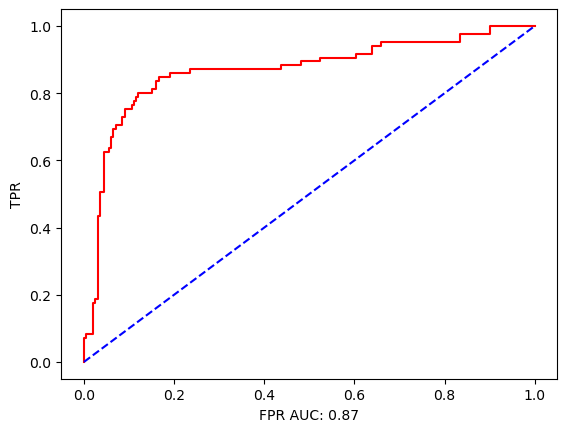

In [188]:
roc(y_test,y_pred_nb_prob)

### Descision tree

In [189]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [190]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [191]:
model_dt.fit(x_train_os,y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

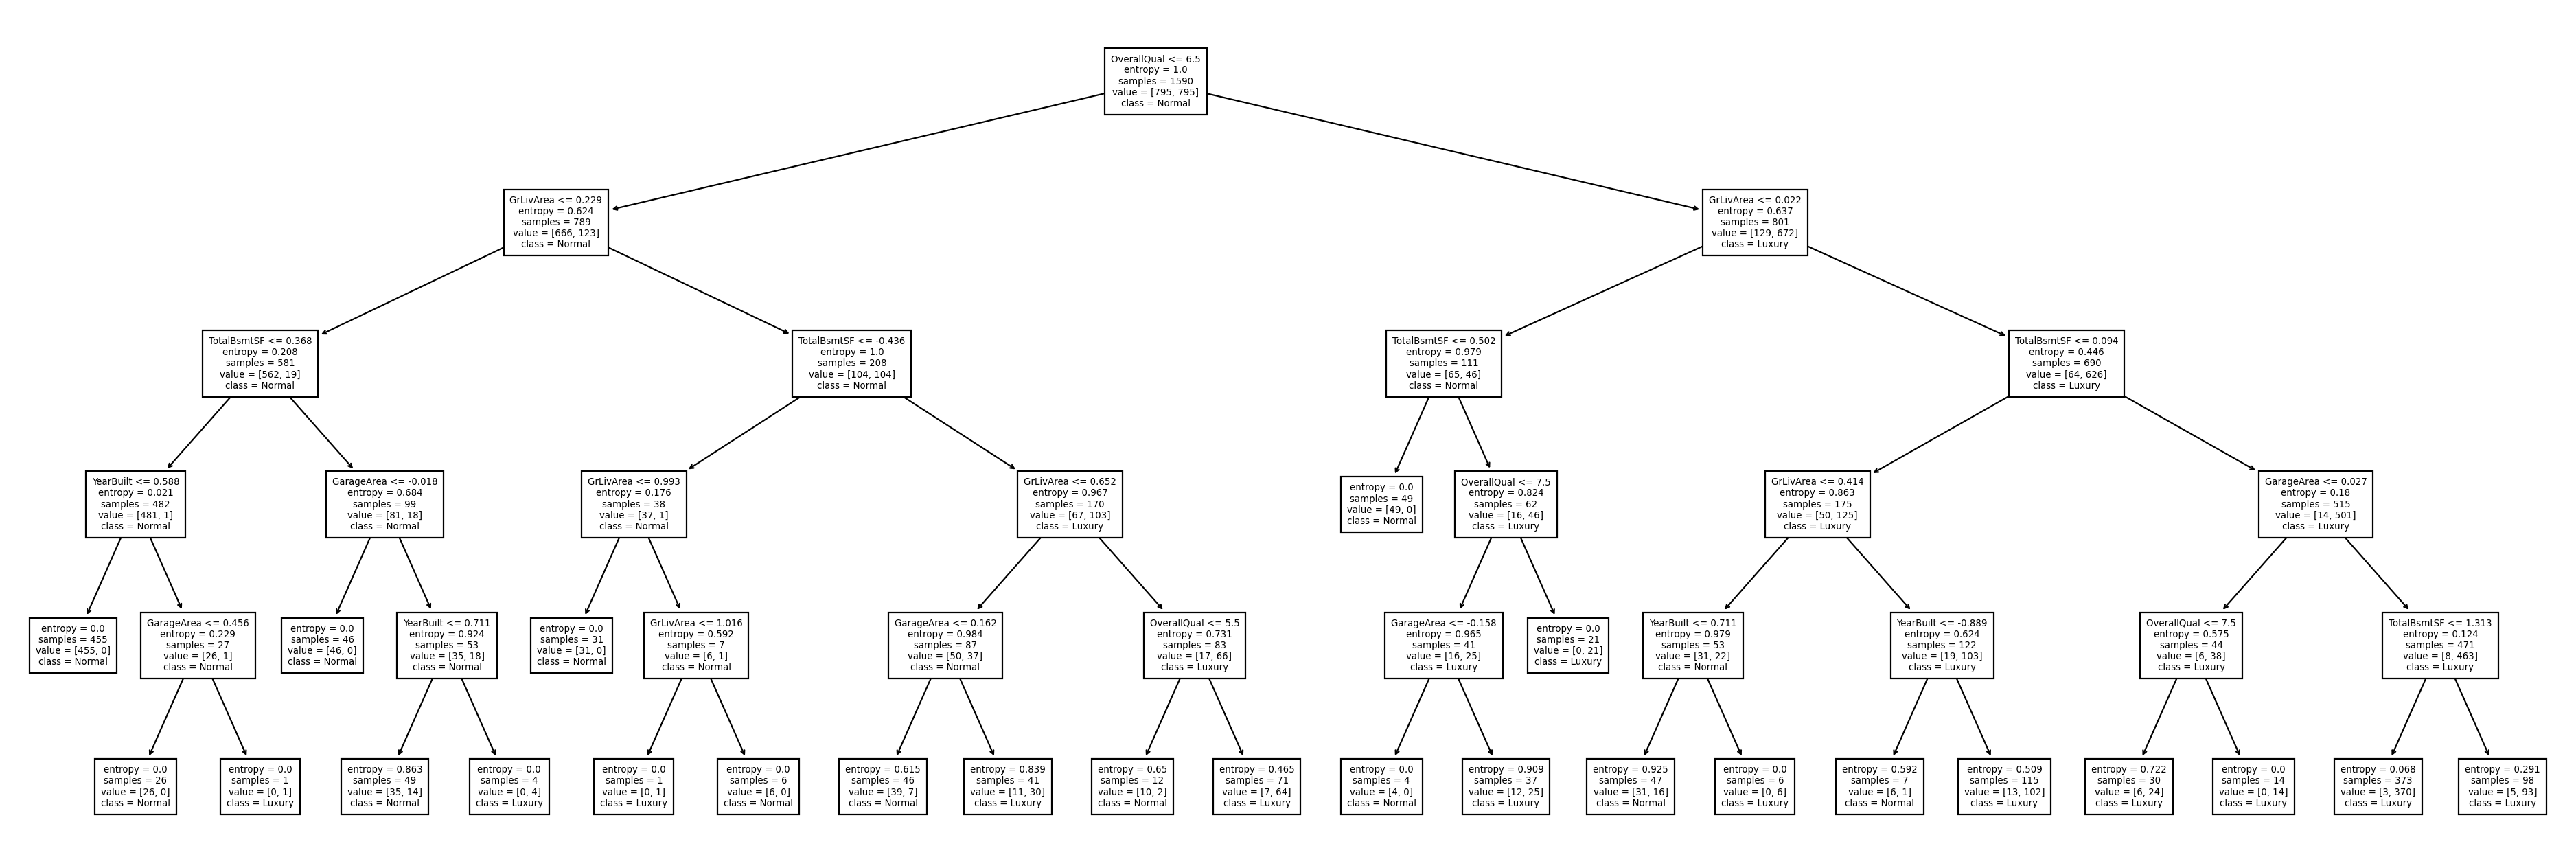

In [192]:
plt.figure(figsize=(30,10),dpi=160)
plot_tree(model_dt,feature_names=x_train_os.columns,class_names=['Normal','Luxury'],fontsize=6)
plt.show()

In [193]:
y_pred_dt = model_dt.predict(x_test)

In [194]:
scores(y_test,y_pred_dt)

Confusion Metrics:
 [[176  23]
 [ 11  74]]
Accuracy:  0.8802816901408451
Recall:  0.8705882352941177
Precision:  0.7628865979381443
F1 score:  0.8131868131868132
Cohen kappa Score:  0.7256662310358544
Classification Summary:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       199
           1       0.76      0.87      0.81        85

    accuracy                           0.88       284
   macro avg       0.85      0.88      0.86       284
weighted avg       0.89      0.88      0.88       284



In [195]:
y_pred_dt_prob = model_dt.predict_proba(x_test)[:,1]

In [196]:
y_pred_dt_prob

array([0.14285714, 0.94897959, 0.        , 0.        , 0.9919571 ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.67567568, 0.9919571 , 0.        , 0.15217391, 0.        ,
       0.        , 0.        , 0.9919571 , 0.        , 0.        ,
       0.        , 0.        , 0.73170732, 0.        , 0.9919571 ,
       0.90140845, 0.9919571 , 0.28571429, 0.        , 0.        ,
       0.73170732, 0.14285714, 0.14285714, 0.67567568, 0.15217391,
       0.8       , 0.        , 0.        , 0.8       , 0.        ,
       0.        , 0.        , 0.67567568, 0.67567568, 0.        ,
       0.9919571 , 0.        , 0.        , 0.        , 1.        ,
       0.15217391, 0.34042553, 0.        , 0.        , 0.        ,
       0.16666667, 0.94897959, 0.9919571 , 0.15217391, 0.        ,
       0.        , 0.88695652, 0.67567568, 0.        , 0.        ,
       0.90140845, 0.9919571 , 0.90140845, 0.        , 0.9919571 ,
       0.        , 0.        , 0.        , 0.15217391, 0.     

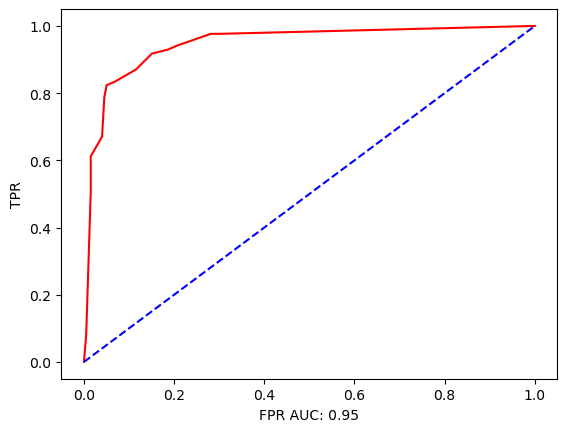

In [197]:
roc(y_test,y_pred_dt_prob)

In [198]:
fpr,tpr,thres = roc_curve(y_test,y_pred_dt_prob)

In [199]:
ft_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thres':thres,'Youden':tpr-fpr})

In [200]:
ft_data.sort_values(by='Youden',ascending=False)

,FPR,TPR,Thres,Youden
6,0.050251,0.823529,0.800000,0.773278
9,0.150754,0.917647,0.340426,0.766893
7,0.070352,0.835294,0.731707,0.764942
8,0.115578,0.870588,0.675676,0.755010
10,0.185930,0.929412,0.285714,0.743482
5,0.045226,0.788235,0.886957,0.743009
11,0.206030,0.941176,0.166667,0.735146
12,0.281407,0.976471,0.152174,0.695064
13,0.301508,0.976471,0.142857,0.674963
4,0.040201,0.670588,0.901408,0.630387


In [201]:
y_pred_dt_46 = np.where(y_pred_dt_prob>0.46,1,0)

In [202]:
scores(y_test,y_pred_dt_46)

Confusion Metrics:
 [[176  23]
 [ 11  74]]
Accuracy:  0.8802816901408451
Recall:  0.8705882352941177
Precision:  0.7628865979381443
F1 score:  0.8131868131868132
Cohen kappa Score:  0.7256662310358544
Classification Summary:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       199
           1       0.76      0.87      0.81        85

    accuracy                           0.88       284
   macro avg       0.85      0.88      0.86       284
weighted avg       0.89      0.88      0.88       284



In [203]:
param = {'max_depth':[3,4,5,6,7],
         'max_features':[10,11,12,13],
         'criterion':['entropy']}

In [204]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=param,
                   cv=3,
                   scoring='f1',
                   verbose=3)

In [205]:
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=entropy, max_depth=3, max_features=10;, score=0.878 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=10;, score=0.886 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=10;, score=0.843 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=11;, score=0.857 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=11;, score=0.871 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=11;, score=0.890 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.878 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.884 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.873 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=13;, score=0.878 total time=   0.0s

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [10, 11, 12, 13]},
             scoring='f1', verbose=3)

In [206]:
gscv.best_score_

0.917112164674671

In [207]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 13}

In [208]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [209]:
model_dt.fit(x_train_os,y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=13)

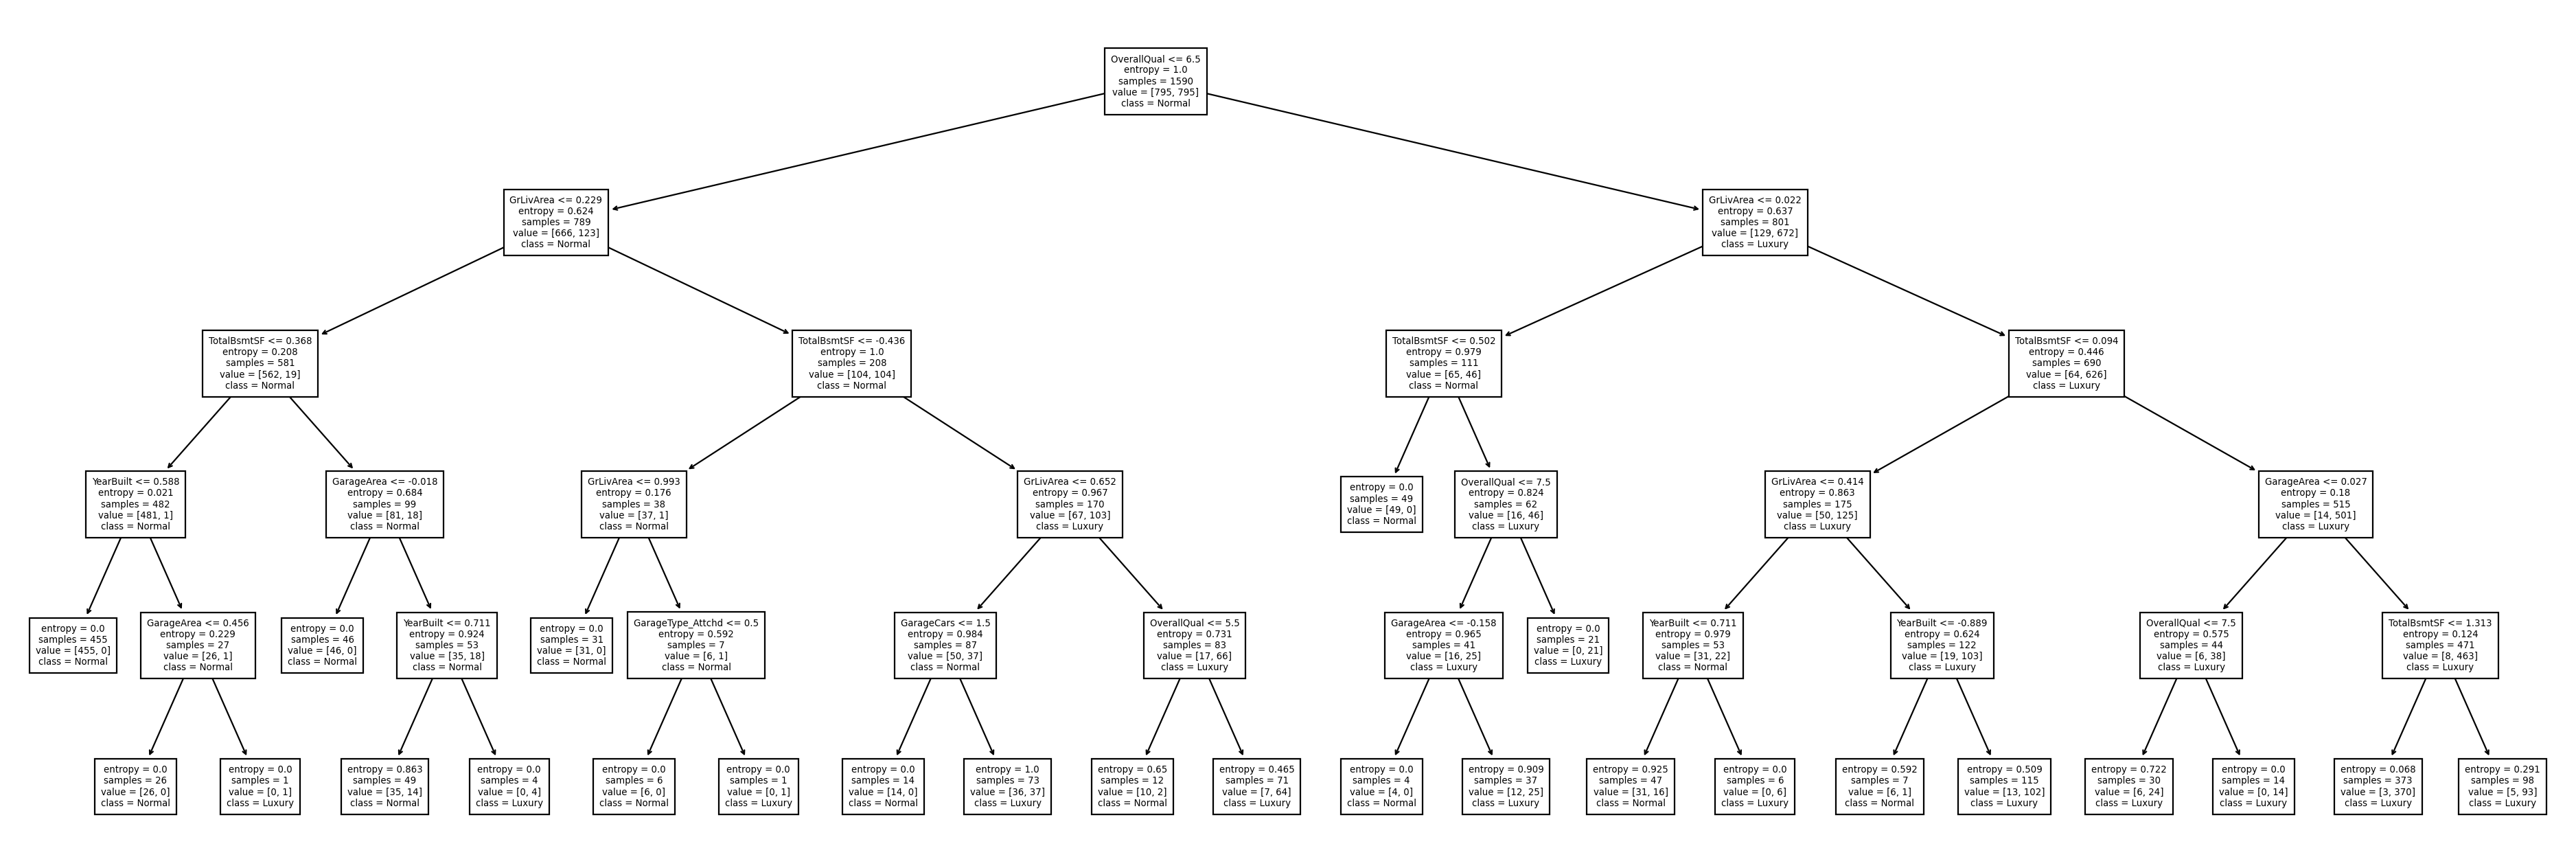

In [210]:
plt.figure(figsize=(30,10),dpi=160)
plot_tree(model_dt,feature_names=x_train_os.columns,class_names=['Normal','Luxury'],fontsize=6)
plt.show()

### Ensemble techniques

#### Bagging (Random Forest)

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
model_rf = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=3)

In [213]:
model_rf.fit(x_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200)

In [214]:
model_rf.score(x_test,y_test)

0.8626760563380281

In [215]:
y_pred_rf = model_rf.predict(x_test)

In [216]:
scores(y_test,y_pred_rf)

Confusion Metrics:
 [[168  31]
 [  8  77]]
Accuracy:  0.8626760563380281
Recall:  0.9058823529411765
Precision:  0.7129629629629629
F1 score:  0.7979274611398964
Cohen kappa Score:  0.6961483594864479
Classification Summary:
               precision    recall  f1-score   support

           0       0.95      0.84      0.90       199
           1       0.71      0.91      0.80        85

    accuracy                           0.86       284
   macro avg       0.83      0.88      0.85       284
weighted avg       0.88      0.86      0.87       284



In [217]:
param = {'n_estimators':[700,1000,1200,1500,1700],
        'max_depth':[4,5,6,7],
        'criterion':['entropy']}

In [218]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param,
                   cv=3,
                   scoring='f1',
                   verbose=3)

In [219]:
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.927 total time=   0.7s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.903 total time=   0.7s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.911 total time=   0.7s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=1000;, score=0.925 total time=   1.0s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=1000;, score=0.905 total time=   1.0s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=1000;, score=0.908 total time=   0.9s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=1200;, score=0.927 total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=1200;, score=0.902 total time=   1.2s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=1200;, score=0.911 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=1500;, score=0.925 t

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6, 7],
                         'n_estimators': [700, 1000, 1200, 1500, 1700]},
             scoring='f1', verbose=3)

In [220]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 700}

In [221]:
gscv.best_score_

0.9304856897750241

In [222]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [223]:
model_rf.fit(x_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=700)

In [224]:
y_pred_rf = model_rf.predict(x_test)

In [225]:
scores(y_test,y_pred_rf)

Confusion Metrics:
 [[170  29]
 [ 10  75]]
Accuracy:  0.8626760563380281
Recall:  0.8823529411764706
Precision:  0.7211538461538461
F1 score:  0.7936507936507936
Cohen kappa Score:  0.6922991443493721
Classification Summary:
               precision    recall  f1-score   support

           0       0.94      0.85      0.90       199
           1       0.72      0.88      0.79        85

    accuracy                           0.86       284
   macro avg       0.83      0.87      0.85       284
weighted avg       0.88      0.86      0.87       284



In [226]:
y_pred_rf_prob = model_rf.predict_proba(x_test)[:,1]

In [227]:
y_pred_rf_prob

array([2.48020598e-01, 9.89443986e-01, 2.13108086e-01, 1.10334950e-02,
       9.74989540e-01, 2.34740681e-02, 9.35954365e-01, 4.80621716e-02,
       1.43293786e-01, 5.84274483e-03, 6.82477586e-01, 9.91228042e-01,
       7.24530416e-03, 3.03412807e-01, 1.80389061e-04, 1.76488578e-02,
       3.50206139e-01, 9.24062242e-01, 1.24336816e-04, 1.95302756e-01,
       8.00759147e-03, 3.13052574e-01, 2.88809908e-01, 8.08084115e-03,
       9.86867127e-01, 6.60251262e-01, 9.21675256e-01, 1.09831078e-01,
       2.60977091e-04, 8.28331513e-02, 7.24833005e-01, 3.65115850e-01,
       2.05853264e-01, 5.10026460e-01, 1.16110216e-01, 6.12804415e-01,
       6.07436530e-02, 3.31201329e-03, 5.57685171e-01, 9.98243979e-03,
       3.01730368e-02, 3.93672670e-03, 6.91928476e-01, 5.55039470e-01,
       2.60176410e-01, 9.79836871e-01, 4.17242871e-03, 1.02169938e-01,
       2.03376352e-02, 9.04675604e-01, 1.72713537e-01, 5.07599927e-01,
       3.68938932e-02, 1.44077419e-02, 5.66695123e-03, 3.08083462e-01,
      

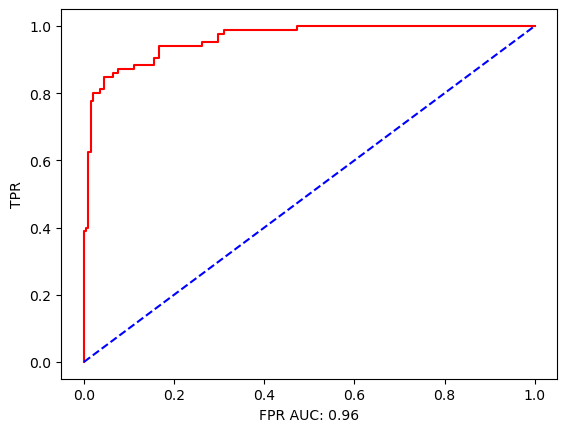

In [228]:
roc(y_test,y_pred_rf_prob)

### Boosting


### Ada boost

In [229]:
from sklearn.ensemble import AdaBoostClassifier

In [230]:
model_ada=AdaBoostClassifier(n_estimators=100)

In [231]:
model_ada.fit(x_train_os,y_train_os)

AdaBoostClassifier(n_estimators=100)

In [232]:
y_pred_ada_prob=model_ada.predict_proba(x_test)[:1]

In [233]:
! pip install xgboost